In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from sklearn.preprocessing import MinMaxScaler

In [90]:
# data frame
df = pd.read_csv('../csv/AUDUSD.csv', header=1)
df = df.rename(columns={"Unnamed: 0":"date", "last_price":"close"})

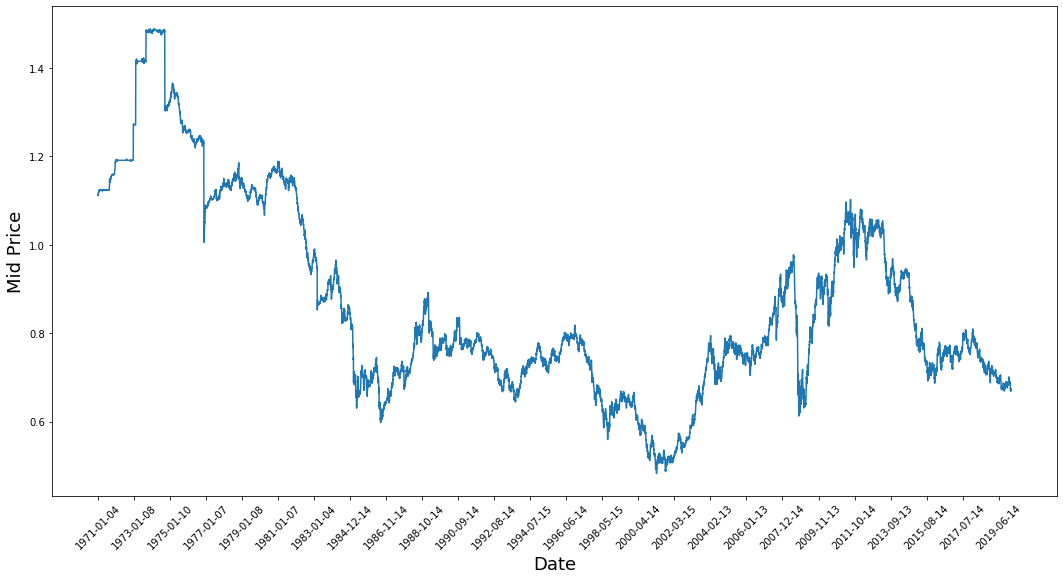

In [91]:
plt.figure(figsize = (18,9))
# plot mid price
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [111]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
print(mid_prices)

[1.1127 1.1132 1.114  ... 0.6749 0.6746 0.6699]


(11000, 1)


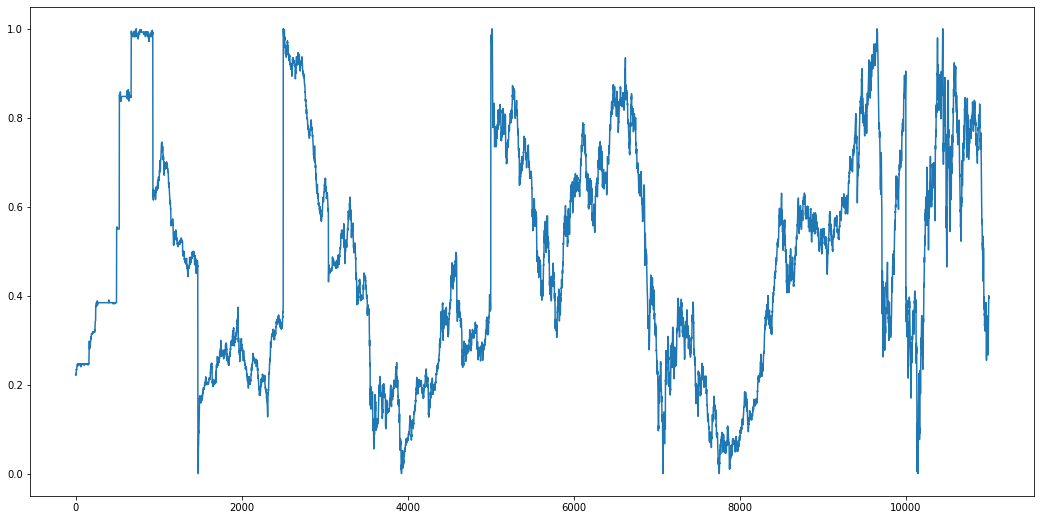

In [93]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

plt.figure(figsize = (18,9))
plt.plot(train_data)
print(train_data.shape)

In [94]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

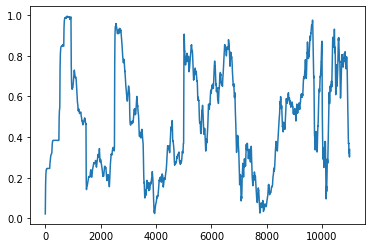

In [95]:
plt.plot(train_data)
train_data = train_data.reshape(11000, 1)

In [96]:
generator = TimeseriesGenerator(train_data, train_data, length=30, batch_size=1)
print(len(generator))

10970


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=20, return_sequences=False, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

model.fit_generator(generator, steps_per_epoch=1, epochs=10970, verbose=2)

Epoch 1/10970
1/1 - 1s - loss: 0.8665
Epoch 2/10970
1/1 - 0s - loss: 0.3067
Epoch 3/10970
1/1 - 0s - loss: 0.8003
Epoch 4/10970
1/1 - 0s - loss: 0.6331
Epoch 5/10970
1/1 - 0s - loss: 0.5417
Epoch 6/10970
1/1 - 0s - loss: 0.8306
Epoch 7/10970
1/1 - 0s - loss: 0.4997
Epoch 8/10970
1/1 - 0s - loss: 0.0398
Epoch 9/10970
1/1 - 0s - loss: 0.4155
Epoch 10/10970
1/1 - 0s - loss: 0.0961
Epoch 11/10970
1/1 - 0s - loss: 0.2762
Epoch 12/10970
1/1 - 0s - loss: 0.6862
Epoch 13/10970
1/1 - 0s - loss: 0.8976
Epoch 14/10970
1/1 - 0s - loss: 0.9493
Epoch 15/10970
1/1 - 0s - loss: 0.7389
Epoch 16/10970
1/1 - 0s - loss: 0.6660
Epoch 17/10970
1/1 - 0s - loss: 0.5032
Epoch 18/10970
1/1 - 0s - loss: 0.2038
Epoch 19/10970
1/1 - 0s - loss: 0.3152
Epoch 20/10970
1/1 - 0s - loss: 0.1223
Epoch 21/10970
1/1 - 0s - loss: 0.5468
Epoch 22/10970
1/1 - 0s - loss: 0.0454
Epoch 23/10970
1/1 - 0s - loss: 0.4315
Epoch 24/10970
1/1 - 0s - loss: 0.2850
Epoch 25/10970
1/1 - 0s - loss: 0.0638
Epoch 26/10970
1/1 - 0s - loss: 0.

Epoch 209/10970
1/1 - 0s - loss: 0.0132
Epoch 210/10970
1/1 - 0s - loss: 0.1144
Epoch 211/10970
1/1 - 0s - loss: 0.0164
Epoch 212/10970
1/1 - 0s - loss: 0.0653
Epoch 213/10970
1/1 - 0s - loss: 0.0911
Epoch 214/10970
1/1 - 0s - loss: 0.0278
Epoch 215/10970
1/1 - 0s - loss: 0.0413
Epoch 216/10970
1/1 - 0s - loss: 0.0256
Epoch 217/10970
1/1 - 0s - loss: 0.0757
Epoch 218/10970
1/1 - 0s - loss: 0.0016
Epoch 219/10970
1/1 - 0s - loss: 0.0035
Epoch 220/10970
1/1 - 0s - loss: 0.0641
Epoch 221/10970
1/1 - 0s - loss: 0.0601
Epoch 222/10970
1/1 - 0s - loss: 0.2763
Epoch 223/10970
1/1 - 0s - loss: 0.0326
Epoch 224/10970
1/1 - 0s - loss: 0.0091
Epoch 225/10970
1/1 - 0s - loss: 0.0106
Epoch 226/10970
1/1 - 0s - loss: 0.0030
Epoch 227/10970
1/1 - 0s - loss: 0.0227
Epoch 228/10970
1/1 - 0s - loss: 0.0279
Epoch 229/10970
1/1 - 0s - loss: 0.0876
Epoch 230/10970
1/1 - 0s - loss: 0.0834
Epoch 231/10970
1/1 - 0s - loss: 0.0429
Epoch 232/10970
1/1 - 0s - loss: 0.0508
Epoch 233/10970
1/1 - 0s - loss: 0.0016


Epoch 414/10970
1/1 - 0s - loss: 0.1106
Epoch 415/10970
1/1 - 0s - loss: 0.0537
Epoch 416/10970
1/1 - 0s - loss: 0.0715
Epoch 417/10970
1/1 - 0s - loss: 0.0050
Epoch 418/10970
1/1 - 0s - loss: 0.0528
Epoch 419/10970
1/1 - 0s - loss: 0.0204
Epoch 420/10970
1/1 - 0s - loss: 0.0346
Epoch 421/10970
1/1 - 0s - loss: 0.0375
Epoch 422/10970
1/1 - 0s - loss: 0.0515
Epoch 423/10970
1/1 - 0s - loss: 0.0592
Epoch 424/10970
1/1 - 0s - loss: 0.0398
Epoch 425/10970
1/1 - 0s - loss: 0.0811
Epoch 426/10970
1/1 - 0s - loss: 0.0414
Epoch 427/10970
1/1 - 0s - loss: 0.0410
Epoch 428/10970
1/1 - 0s - loss: 0.0494
Epoch 429/10970
1/1 - 0s - loss: 0.0337
Epoch 430/10970
1/1 - 0s - loss: 0.0174
Epoch 431/10970
1/1 - 0s - loss: 0.0166
Epoch 432/10970
1/1 - 0s - loss: 0.2315
Epoch 433/10970
1/1 - 0s - loss: 0.0985
Epoch 434/10970
1/1 - 0s - loss: 0.0166
Epoch 435/10970
1/1 - 0s - loss: 0.0399
Epoch 436/10970
1/1 - 0s - loss: 0.0508
Epoch 437/10970
1/1 - 0s - loss: 0.0522
Epoch 438/10970
1/1 - 0s - loss: 0.0160


Epoch 619/10970
1/1 - 0s - loss: 0.0485
Epoch 620/10970
1/1 - 0s - loss: 0.0287
Epoch 621/10970
1/1 - 0s - loss: 0.0522
Epoch 622/10970
1/1 - 0s - loss: 0.0050
Epoch 623/10970
1/1 - 0s - loss: 0.0174
Epoch 624/10970
1/1 - 0s - loss: 2.8652e-04
Epoch 625/10970
1/1 - 0s - loss: 0.0276
Epoch 626/10970
1/1 - 0s - loss: 0.0385
Epoch 627/10970
1/1 - 0s - loss: 0.0102
Epoch 628/10970
1/1 - 0s - loss: 7.8911e-04
Epoch 629/10970
1/1 - 0s - loss: 0.0289
Epoch 630/10970
1/1 - 0s - loss: 0.0178
Epoch 631/10970
1/1 - 0s - loss: 0.0187
Epoch 632/10970
1/1 - 0s - loss: 0.0264
Epoch 633/10970
1/1 - 0s - loss: 0.0181
Epoch 634/10970
1/1 - 0s - loss: 0.0475
Epoch 635/10970
1/1 - 0s - loss: 0.0343
Epoch 636/10970
1/1 - 0s - loss: 0.0295
Epoch 637/10970
1/1 - 0s - loss: 0.0479
Epoch 638/10970
1/1 - 0s - loss: 0.0811
Epoch 639/10970
1/1 - 0s - loss: 0.0360
Epoch 640/10970
1/1 - 0s - loss: 0.0112
Epoch 641/10970
1/1 - 0s - loss: 0.0074
Epoch 642/10970
1/1 - 0s - loss: 0.0228
Epoch 643/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0438
Epoch 824/10970
1/1 - 0s - loss: 4.9174e-04
Epoch 825/10970
1/1 - 0s - loss: 0.0273
Epoch 826/10970
1/1 - 0s - loss: 0.0511
Epoch 827/10970
1/1 - 0s - loss: 0.0255
Epoch 828/10970
1/1 - 0s - loss: 0.0395
Epoch 829/10970
1/1 - 0s - loss: 0.0039
Epoch 830/10970
1/1 - 0s - loss: 0.0706
Epoch 831/10970
1/1 - 0s - loss: 0.0422
Epoch 832/10970
1/1 - 0s - loss: 0.0056
Epoch 833/10970
1/1 - 0s - loss: 0.0372
Epoch 834/10970
1/1 - 0s - loss: 0.0164
Epoch 835/10970
1/1 - 0s - loss: 0.0104
Epoch 836/10970
1/1 - 0s - loss: 0.0397
Epoch 837/10970
1/1 - 0s - loss: 0.0710
Epoch 838/10970
1/1 - 0s - loss: 0.0401
Epoch 839/10970
1/1 - 0s - loss: 0.0134
Epoch 840/10970
1/1 - 0s - loss: 0.0013
Epoch 841/10970
1/1 - 0s - loss: 0.0211
Epoch 842/10970
1/1 - 0s - loss: 0.0259
Epoch 843/10970
1/1 - 0s - loss: 0.0086
Epoch 844/10970
1/1 - 0s - loss: 0.0021
Epoch 845/10970
1/1 - 0s - loss: 0.0197
Epoch 846/10970
1/1 - 0s - loss: 0.0405
Epoch 847/10970
1/1 - 0s - loss: 0.0232
Epoch 848/10

Epoch 1027/10970
1/1 - 0s - loss: 0.0107
Epoch 1028/10970
1/1 - 0s - loss: 0.0045
Epoch 1029/10970
1/1 - 0s - loss: 0.0044
Epoch 1030/10970
1/1 - 0s - loss: 0.0263
Epoch 1031/10970
1/1 - 0s - loss: 0.0169
Epoch 1032/10970
1/1 - 0s - loss: 0.0039
Epoch 1033/10970
1/1 - 0s - loss: 0.0075
Epoch 1034/10970
1/1 - 0s - loss: 0.0024
Epoch 1035/10970
1/1 - 0s - loss: 0.0212
Epoch 1036/10970
1/1 - 0s - loss: 0.0201
Epoch 1037/10970
1/1 - 0s - loss: 2.1046e-04
Epoch 1038/10970
1/1 - 0s - loss: 0.0035
Epoch 1039/10970
1/1 - 0s - loss: 0.0174
Epoch 1040/10970
1/1 - 0s - loss: 0.0272
Epoch 1041/10970
1/1 - 0s - loss: 0.0061
Epoch 1042/10970
1/1 - 0s - loss: 0.0284
Epoch 1043/10970
1/1 - 0s - loss: 0.0167
Epoch 1044/10970
1/1 - 0s - loss: 0.0051
Epoch 1045/10970
1/1 - 0s - loss: 0.0155
Epoch 1046/10970
1/1 - 0s - loss: 0.0293
Epoch 1047/10970
1/1 - 0s - loss: 0.0402
Epoch 1048/10970
1/1 - 0s - loss: 0.0148
Epoch 1049/10970
1/1 - 0s - loss: 0.0555
Epoch 1050/10970
1/1 - 0s - loss: 0.0081
Epoch 1051/1

1/1 - 0s - loss: 0.0296
Epoch 1227/10970
1/1 - 0s - loss: 0.0259
Epoch 1228/10970
1/1 - 0s - loss: 0.0311
Epoch 1229/10970
1/1 - 0s - loss: 0.0240
Epoch 1230/10970
1/1 - 0s - loss: 0.0052
Epoch 1231/10970
1/1 - 0s - loss: 6.1849e-04
Epoch 1232/10970
1/1 - 0s - loss: 0.0092
Epoch 1233/10970
1/1 - 0s - loss: 0.0100
Epoch 1234/10970
1/1 - 0s - loss: 0.0712
Epoch 1235/10970
1/1 - 0s - loss: 0.0454
Epoch 1236/10970
1/1 - 0s - loss: 0.0276
Epoch 1237/10970
1/1 - 0s - loss: 0.0173
Epoch 1238/10970
1/1 - 0s - loss: 0.0193
Epoch 1239/10970
1/1 - 0s - loss: 0.0083
Epoch 1240/10970
1/1 - 0s - loss: 0.0036
Epoch 1241/10970
1/1 - 0s - loss: 0.0174
Epoch 1242/10970
1/1 - 0s - loss: 0.0338
Epoch 1243/10970
1/1 - 0s - loss: 0.0045
Epoch 1244/10970
1/1 - 0s - loss: 0.0155
Epoch 1245/10970
1/1 - 0s - loss: 0.0093
Epoch 1246/10970
1/1 - 0s - loss: 0.0089
Epoch 1247/10970
1/1 - 0s - loss: 0.0267
Epoch 1248/10970
1/1 - 0s - loss: 0.0113
Epoch 1249/10970
1/1 - 0s - loss: 0.0238
Epoch 1250/10970
1/1 - 0s - l

Epoch 1426/10970
1/1 - 0s - loss: 0.0311
Epoch 1427/10970
1/1 - 0s - loss: 0.0130
Epoch 1428/10970
1/1 - 0s - loss: 0.0144
Epoch 1429/10970
1/1 - 0s - loss: 0.0070
Epoch 1430/10970
1/1 - 0s - loss: 0.0174
Epoch 1431/10970
1/1 - 0s - loss: 0.0666
Epoch 1432/10970
1/1 - 0s - loss: 0.0482
Epoch 1433/10970
1/1 - 0s - loss: 0.0780
Epoch 1434/10970
1/1 - 0s - loss: 0.0739
Epoch 1435/10970
1/1 - 0s - loss: 0.0393
Epoch 1436/10970
1/1 - 0s - loss: 0.0236
Epoch 1437/10970
1/1 - 0s - loss: 0.0234
Epoch 1438/10970
1/1 - 0s - loss: 0.0055
Epoch 1439/10970
1/1 - 0s - loss: 0.0113
Epoch 1440/10970
1/1 - 0s - loss: 0.0103
Epoch 1441/10970
1/1 - 0s - loss: 0.0089
Epoch 1442/10970
1/1 - 0s - loss: 0.0186
Epoch 1443/10970
1/1 - 0s - loss: 0.0336
Epoch 1444/10970
1/1 - 0s - loss: 0.0558
Epoch 1445/10970
1/1 - 0s - loss: 0.0351
Epoch 1446/10970
1/1 - 0s - loss: 0.0191
Epoch 1447/10970
1/1 - 0s - loss: 0.0272
Epoch 1448/10970
1/1 - 0s - loss: 0.0462
Epoch 1449/10970
1/1 - 0s - loss: 0.0224
Epoch 1450/10970

Epoch 1625/10970
1/1 - 0s - loss: 0.0140
Epoch 1626/10970
1/1 - 0s - loss: 0.0038
Epoch 1627/10970
1/1 - 0s - loss: 0.0047
Epoch 1628/10970
1/1 - 0s - loss: 0.0026
Epoch 1629/10970
1/1 - 0s - loss: 0.0172
Epoch 1630/10970
1/1 - 0s - loss: 0.0089
Epoch 1631/10970
1/1 - 0s - loss: 0.0042
Epoch 1632/10970
1/1 - 0s - loss: 0.0071
Epoch 1633/10970
1/1 - 0s - loss: 0.0142
Epoch 1634/10970
1/1 - 0s - loss: 0.0051
Epoch 1635/10970
1/1 - 0s - loss: 0.0080
Epoch 1636/10970
1/1 - 0s - loss: 0.0073
Epoch 1637/10970
1/1 - 0s - loss: 0.0172
Epoch 1638/10970
1/1 - 0s - loss: 0.0015
Epoch 1639/10970
1/1 - 0s - loss: 0.0360
Epoch 1640/10970
1/1 - 0s - loss: 0.0052
Epoch 1641/10970
1/1 - 0s - loss: 0.0064
Epoch 1642/10970
1/1 - 0s - loss: 0.0078
Epoch 1643/10970
1/1 - 0s - loss: 0.0108
Epoch 1644/10970
1/1 - 0s - loss: 0.0242
Epoch 1645/10970
1/1 - 0s - loss: 0.0122
Epoch 1646/10970
1/1 - 0s - loss: 0.0199
Epoch 1647/10970
1/1 - 0s - loss: 0.0162
Epoch 1648/10970
1/1 - 0s - loss: 0.0210
Epoch 1649/10970

Epoch 1824/10970
1/1 - 0s - loss: 0.0103
Epoch 1825/10970
1/1 - 0s - loss: 0.0140
Epoch 1826/10970
1/1 - 0s - loss: 0.0029
Epoch 1827/10970
1/1 - 0s - loss: 0.0129
Epoch 1828/10970
1/1 - 0s - loss: 0.0253
Epoch 1829/10970
1/1 - 0s - loss: 0.0149
Epoch 1830/10970
1/1 - 0s - loss: 0.0077
Epoch 1831/10970
1/1 - 0s - loss: 0.0125
Epoch 1832/10970
1/1 - 0s - loss: 0.0102
Epoch 1833/10970
1/1 - 0s - loss: 0.0205
Epoch 1834/10970
1/1 - 0s - loss: 0.0065
Epoch 1835/10970
1/1 - 0s - loss: 0.0051
Epoch 1836/10970
1/1 - 0s - loss: 0.0046
Epoch 1837/10970
1/1 - 0s - loss: 0.0100
Epoch 1838/10970
1/1 - 0s - loss: 0.0054
Epoch 1839/10970
1/1 - 0s - loss: 0.0113
Epoch 1840/10970
1/1 - 0s - loss: 0.0213
Epoch 1841/10970
1/1 - 0s - loss: 0.0030
Epoch 1842/10970
1/1 - 0s - loss: 0.0797
Epoch 1843/10970
1/1 - 0s - loss: 0.0011
Epoch 1844/10970
1/1 - 0s - loss: 0.0021
Epoch 1845/10970
1/1 - 0s - loss: 0.0103
Epoch 1846/10970
1/1 - 0s - loss: 0.0602
Epoch 1847/10970
1/1 - 0s - loss: 0.0377
Epoch 1848/10970

1/1 - 0s - loss: 0.0067
Epoch 2024/10970
1/1 - 0s - loss: 0.0108
Epoch 2025/10970
1/1 - 0s - loss: 0.0136
Epoch 2026/10970
1/1 - 0s - loss: 0.0156
Epoch 2027/10970
1/1 - 0s - loss: 0.0012
Epoch 2028/10970
1/1 - 0s - loss: 0.0010
Epoch 2029/10970
1/1 - 0s - loss: 0.0030
Epoch 2030/10970
1/1 - 0s - loss: 0.0511
Epoch 2031/10970
1/1 - 0s - loss: 0.0129
Epoch 2032/10970
1/1 - 0s - loss: 0.0055
Epoch 2033/10970
1/1 - 0s - loss: 0.0012
Epoch 2034/10970
1/1 - 0s - loss: 0.0135
Epoch 2035/10970
1/1 - 0s - loss: 0.0143
Epoch 2036/10970
1/1 - 0s - loss: 0.0121
Epoch 2037/10970
1/1 - 0s - loss: 0.0040
Epoch 2038/10970
1/1 - 0s - loss: 0.0099
Epoch 2039/10970
1/1 - 0s - loss: 0.0159
Epoch 2040/10970
1/1 - 0s - loss: 0.0015
Epoch 2041/10970
1/1 - 0s - loss: 0.0178
Epoch 2042/10970
1/1 - 0s - loss: 0.0076
Epoch 2043/10970
1/1 - 0s - loss: 0.0277
Epoch 2044/10970
1/1 - 0s - loss: 0.0251
Epoch 2045/10970
1/1 - 0s - loss: 0.0173
Epoch 2046/10970
1/1 - 0s - loss: 0.0215
Epoch 2047/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0047
Epoch 2223/10970
1/1 - 0s - loss: 0.0068
Epoch 2224/10970
1/1 - 0s - loss: 0.0049
Epoch 2225/10970
1/1 - 0s - loss: 0.0159
Epoch 2226/10970
1/1 - 0s - loss: 0.0171
Epoch 2227/10970
1/1 - 0s - loss: 0.0056
Epoch 2228/10970
1/1 - 0s - loss: 0.0073
Epoch 2229/10970
1/1 - 0s - loss: 0.0326
Epoch 2230/10970
1/1 - 0s - loss: 0.0356
Epoch 2231/10970
1/1 - 0s - loss: 0.0153
Epoch 2232/10970
1/1 - 0s - loss: 0.0538
Epoch 2233/10970
1/1 - 0s - loss: 0.0047
Epoch 2234/10970
1/1 - 0s - loss: 0.0060
Epoch 2235/10970
1/1 - 0s - loss: 0.0041
Epoch 2236/10970
1/1 - 0s - loss: 0.0029
Epoch 2237/10970
1/1 - 0s - loss: 0.0443
Epoch 2238/10970
1/1 - 0s - loss: 0.0485
Epoch 2239/10970
1/1 - 0s - loss: 0.0435
Epoch 2240/10970
1/1 - 0s - loss: 0.0017
Epoch 2241/10970
1/1 - 0s - loss: 0.0106
Epoch 2242/10970
1/1 - 0s - loss: 0.0205
Epoch 2243/10970
1/1 - 0s - loss: 0.0665
Epoch 2244/10970
1/1 - 0s - loss: 0.0097
Epoch 2245/10970
1/1 - 0s - loss: 0.0091
Epoch 2246/10970
1/1 - 0s - loss:

Epoch 2422/10970
1/1 - 0s - loss: 0.0141
Epoch 2423/10970
1/1 - 0s - loss: 0.0092
Epoch 2424/10970
1/1 - 0s - loss: 0.0035
Epoch 2425/10970
1/1 - 0s - loss: 0.0056
Epoch 2426/10970
1/1 - 0s - loss: 0.0335
Epoch 2427/10970
1/1 - 0s - loss: 0.0363
Epoch 2428/10970
1/1 - 0s - loss: 0.0345
Epoch 2429/10970
1/1 - 0s - loss: 0.0424
Epoch 2430/10970
1/1 - 0s - loss: 0.0042
Epoch 2431/10970
1/1 - 0s - loss: 0.0300
Epoch 2432/10970
1/1 - 0s - loss: 0.0193
Epoch 2433/10970
1/1 - 0s - loss: 0.0052
Epoch 2434/10970
1/1 - 0s - loss: 0.0045
Epoch 2435/10970
1/1 - 0s - loss: 0.0047
Epoch 2436/10970
1/1 - 0s - loss: 0.0043
Epoch 2437/10970
1/1 - 0s - loss: 0.0285
Epoch 2438/10970
1/1 - 0s - loss: 0.0453
Epoch 2439/10970
1/1 - 0s - loss: 0.0083
Epoch 2440/10970
1/1 - 0s - loss: 0.0036
Epoch 2441/10970
1/1 - 0s - loss: 0.0043
Epoch 2442/10970
1/1 - 0s - loss: 0.0112
Epoch 2443/10970
1/1 - 0s - loss: 0.0058
Epoch 2444/10970
1/1 - 0s - loss: 0.0049
Epoch 2445/10970
1/1 - 0s - loss: 0.0205
Epoch 2446/10970

Epoch 2621/10970
1/1 - 0s - loss: 0.0088
Epoch 2622/10970
1/1 - 0s - loss: 0.0108
Epoch 2623/10970
1/1 - 0s - loss: 0.0012
Epoch 2624/10970
1/1 - 0s - loss: 0.0057
Epoch 2625/10970
1/1 - 0s - loss: 0.0263
Epoch 2626/10970
1/1 - 0s - loss: 0.0062
Epoch 2627/10970
1/1 - 0s - loss: 5.5844e-04
Epoch 2628/10970
1/1 - 0s - loss: 0.0080
Epoch 2629/10970
1/1 - 0s - loss: 0.0087
Epoch 2630/10970
1/1 - 0s - loss: 0.0183
Epoch 2631/10970
1/1 - 0s - loss: 0.0065
Epoch 2632/10970
1/1 - 0s - loss: 0.0272
Epoch 2633/10970
1/1 - 0s - loss: 0.0073
Epoch 2634/10970
1/1 - 0s - loss: 0.0046
Epoch 2635/10970
1/1 - 0s - loss: 0.0109
Epoch 2636/10970
1/1 - 0s - loss: 0.0112
Epoch 2637/10970
1/1 - 0s - loss: 0.0381
Epoch 2638/10970
1/1 - 0s - loss: 0.0096
Epoch 2639/10970
1/1 - 0s - loss: 0.0018
Epoch 2640/10970
1/1 - 0s - loss: 0.0184
Epoch 2641/10970
1/1 - 0s - loss: 0.0178
Epoch 2642/10970
1/1 - 0s - loss: 0.0117
Epoch 2643/10970
1/1 - 0s - loss: 0.0088
Epoch 2644/10970
1/1 - 0s - loss: 0.0159
Epoch 2645/1

1/1 - 0s - loss: 0.0158
Epoch 2820/10970
1/1 - 0s - loss: 0.0236
Epoch 2821/10970
1/1 - 0s - loss: 0.0259
Epoch 2822/10970
1/1 - 0s - loss: 0.0230
Epoch 2823/10970
1/1 - 0s - loss: 0.0032
Epoch 2824/10970
1/1 - 0s - loss: 0.0162
Epoch 2825/10970
1/1 - 0s - loss: 0.0017
Epoch 2826/10970
1/1 - 0s - loss: 0.0014
Epoch 2827/10970
1/1 - 0s - loss: 4.4301e-04
Epoch 2828/10970
1/1 - 0s - loss: 0.0059
Epoch 2829/10970
1/1 - 0s - loss: 0.0312
Epoch 2830/10970
1/1 - 0s - loss: 0.0077
Epoch 2831/10970
1/1 - 0s - loss: 0.0013
Epoch 2832/10970
1/1 - 0s - loss: 0.0318
Epoch 2833/10970
1/1 - 0s - loss: 0.0047
Epoch 2834/10970
1/1 - 0s - loss: 0.0023
Epoch 2835/10970
1/1 - 0s - loss: 0.0272
Epoch 2836/10970
1/1 - 0s - loss: 5.7778e-04
Epoch 2837/10970
1/1 - 0s - loss: 0.0189
Epoch 2838/10970
1/1 - 0s - loss: 0.0362
Epoch 2839/10970
1/1 - 0s - loss: 0.0083
Epoch 2840/10970
1/1 - 0s - loss: 0.0229
Epoch 2841/10970
1/1 - 0s - loss: 0.0168
Epoch 2842/10970
1/1 - 0s - loss: 0.0440
Epoch 2843/10970
1/1 - 0s

1/1 - 0s - loss: 0.0120
Epoch 3019/10970
1/1 - 0s - loss: 0.0024
Epoch 3020/10970
1/1 - 0s - loss: 0.0049
Epoch 3021/10970
1/1 - 0s - loss: 0.0165
Epoch 3022/10970
1/1 - 0s - loss: 0.0205
Epoch 3023/10970
1/1 - 0s - loss: 0.0099
Epoch 3024/10970
1/1 - 0s - loss: 0.0082
Epoch 3025/10970
1/1 - 0s - loss: 0.0061
Epoch 3026/10970
1/1 - 0s - loss: 0.0089
Epoch 3027/10970
1/1 - 0s - loss: 0.0026
Epoch 3028/10970
1/1 - 0s - loss: 0.0836
Epoch 3029/10970
1/1 - 0s - loss: 0.0309
Epoch 3030/10970
1/1 - 0s - loss: 0.0085
Epoch 3031/10970
1/1 - 0s - loss: 3.2824e-04
Epoch 3032/10970
1/1 - 0s - loss: 7.6449e-04
Epoch 3033/10970
1/1 - 0s - loss: 0.0086
Epoch 3034/10970
1/1 - 0s - loss: 0.0095
Epoch 3035/10970
1/1 - 0s - loss: 4.0311e-04
Epoch 3036/10970
1/1 - 0s - loss: 0.0348
Epoch 3037/10970
1/1 - 0s - loss: 0.0040
Epoch 3038/10970
1/1 - 0s - loss: 0.0165
Epoch 3039/10970
1/1 - 0s - loss: 0.0178
Epoch 3040/10970
1/1 - 0s - loss: 0.0224
Epoch 3041/10970
1/1 - 0s - loss: 0.0149
Epoch 3042/10970
1/1 

1/1 - 0s - loss: 0.0286
Epoch 3218/10970
1/1 - 0s - loss: 0.0305
Epoch 3219/10970
1/1 - 0s - loss: 5.4464e-04
Epoch 3220/10970
1/1 - 0s - loss: 0.0149
Epoch 3221/10970
1/1 - 0s - loss: 5.5137e-04
Epoch 3222/10970
1/1 - 0s - loss: 0.0241
Epoch 3223/10970
1/1 - 0s - loss: 0.0161
Epoch 3224/10970
1/1 - 0s - loss: 0.0057
Epoch 3225/10970
1/1 - 0s - loss: 0.0202
Epoch 3226/10970
1/1 - 0s - loss: 0.0081
Epoch 3227/10970
1/1 - 0s - loss: 0.0171
Epoch 3228/10970
1/1 - 0s - loss: 0.0202
Epoch 3229/10970
1/1 - 0s - loss: 0.0435
Epoch 3230/10970
1/1 - 0s - loss: 0.0281
Epoch 3231/10970
1/1 - 0s - loss: 0.0302
Epoch 3232/10970
1/1 - 0s - loss: 0.0311
Epoch 3233/10970
1/1 - 0s - loss: 0.0448
Epoch 3234/10970
1/1 - 0s - loss: 0.0236
Epoch 3235/10970
1/1 - 0s - loss: 0.0090
Epoch 3236/10970
1/1 - 0s - loss: 0.0049
Epoch 3237/10970
1/1 - 0s - loss: 0.0233
Epoch 3238/10970
1/1 - 0s - loss: 0.0166
Epoch 3239/10970
1/1 - 0s - loss: 0.0928
Epoch 3240/10970
1/1 - 0s - loss: 0.0131
Epoch 3241/10970
1/1 - 0s

1/1 - 0s - loss: 0.0037
Epoch 3417/10970
1/1 - 0s - loss: 0.0130
Epoch 3418/10970
1/1 - 0s - loss: 0.0046
Epoch 3419/10970
1/1 - 0s - loss: 0.0176
Epoch 3420/10970
1/1 - 0s - loss: 0.0656
Epoch 3421/10970
1/1 - 0s - loss: 0.0083
Epoch 3422/10970
1/1 - 0s - loss: 0.0104
Epoch 3423/10970
1/1 - 0s - loss: 0.0250
Epoch 3424/10970
1/1 - 0s - loss: 0.0032
Epoch 3425/10970
1/1 - 0s - loss: 0.0035
Epoch 3426/10970
1/1 - 0s - loss: 0.0094
Epoch 3427/10970
1/1 - 0s - loss: 0.0063
Epoch 3428/10970
1/1 - 0s - loss: 0.0233
Epoch 3429/10970
1/1 - 0s - loss: 0.0093
Epoch 3430/10970
1/1 - 0s - loss: 0.0119
Epoch 3431/10970
1/1 - 0s - loss: 7.8207e-04
Epoch 3432/10970
1/1 - 0s - loss: 0.0164
Epoch 3433/10970
1/1 - 0s - loss: 0.0250
Epoch 3434/10970
1/1 - 0s - loss: 0.0056
Epoch 3435/10970
1/1 - 0s - loss: 0.0182
Epoch 3436/10970
1/1 - 0s - loss: 0.0074
Epoch 3437/10970
1/1 - 0s - loss: 0.0039
Epoch 3438/10970
1/1 - 0s - loss: 0.0034
Epoch 3439/10970
1/1 - 0s - loss: 0.0126
Epoch 3440/10970
1/1 - 0s - l

Epoch 3615/10970
1/1 - 0s - loss: 0.0143
Epoch 3616/10970
1/1 - 0s - loss: 0.0076
Epoch 3617/10970
1/1 - 0s - loss: 0.0202
Epoch 3618/10970
1/1 - 0s - loss: 0.0043
Epoch 3619/10970
1/1 - 0s - loss: 0.0097
Epoch 3620/10970
1/1 - 0s - loss: 0.0054
Epoch 3621/10970
1/1 - 0s - loss: 0.0045
Epoch 3622/10970
1/1 - 0s - loss: 0.0129
Epoch 3623/10970
1/1 - 0s - loss: 0.0078
Epoch 3624/10970
1/1 - 0s - loss: 0.0228
Epoch 3625/10970
1/1 - 0s - loss: 0.0486
Epoch 3626/10970
1/1 - 0s - loss: 0.0037
Epoch 3627/10970
1/1 - 0s - loss: 0.0129
Epoch 3628/10970
1/1 - 0s - loss: 0.0143
Epoch 3629/10970
1/1 - 0s - loss: 0.0179
Epoch 3630/10970
1/1 - 0s - loss: 4.0404e-04
Epoch 3631/10970
1/1 - 0s - loss: 0.0111
Epoch 3632/10970
1/1 - 0s - loss: 0.0026
Epoch 3633/10970
1/1 - 0s - loss: 0.0081
Epoch 3634/10970
1/1 - 0s - loss: 0.0024
Epoch 3635/10970
1/1 - 0s - loss: 0.0011
Epoch 3636/10970
1/1 - 0s - loss: 0.0035
Epoch 3637/10970
1/1 - 0s - loss: 0.0107
Epoch 3638/10970
1/1 - 0s - loss: 0.0164
Epoch 3639/1

1/1 - 0s - loss: 0.0038
Epoch 3814/10970
1/1 - 0s - loss: 0.0208
Epoch 3815/10970
1/1 - 0s - loss: 0.0132
Epoch 3816/10970
1/1 - 0s - loss: 0.0540
Epoch 3817/10970
1/1 - 0s - loss: 0.0072
Epoch 3818/10970
1/1 - 0s - loss: 0.0189
Epoch 3819/10970
1/1 - 0s - loss: 0.0117
Epoch 3820/10970
1/1 - 0s - loss: 0.0113
Epoch 3821/10970
1/1 - 0s - loss: 0.0101
Epoch 3822/10970
1/1 - 0s - loss: 0.0130
Epoch 3823/10970
1/1 - 0s - loss: 0.0054
Epoch 3824/10970
1/1 - 0s - loss: 0.0082
Epoch 3825/10970
1/1 - 0s - loss: 0.0078
Epoch 3826/10970
1/1 - 0s - loss: 0.0053
Epoch 3827/10970
1/1 - 0s - loss: 0.0078
Epoch 3828/10970
1/1 - 0s - loss: 0.0049
Epoch 3829/10970
1/1 - 0s - loss: 0.0181
Epoch 3830/10970
1/1 - 0s - loss: 0.0120
Epoch 3831/10970
1/1 - 0s - loss: 0.0057
Epoch 3832/10970
1/1 - 0s - loss: 0.0312
Epoch 3833/10970
1/1 - 0s - loss: 0.0079
Epoch 3834/10970
1/1 - 0s - loss: 0.0107
Epoch 3835/10970
1/1 - 0s - loss: 0.0050
Epoch 3836/10970
1/1 - 0s - loss: 0.0110
Epoch 3837/10970
1/1 - 0s - loss:

Epoch 4013/10970
1/1 - 0s - loss: 0.0158
Epoch 4014/10970
1/1 - 0s - loss: 0.0052
Epoch 4015/10970
1/1 - 0s - loss: 0.0081
Epoch 4016/10970
1/1 - 0s - loss: 0.0014
Epoch 4017/10970
1/1 - 0s - loss: 0.0061
Epoch 4018/10970
1/1 - 0s - loss: 0.0051
Epoch 4019/10970
1/1 - 0s - loss: 0.0065
Epoch 4020/10970
1/1 - 0s - loss: 0.0015
Epoch 4021/10970
1/1 - 0s - loss: 0.0190
Epoch 4022/10970
1/1 - 0s - loss: 0.0039
Epoch 4023/10970
1/1 - 0s - loss: 0.0948
Epoch 4024/10970
1/1 - 0s - loss: 0.0044
Epoch 4025/10970
1/1 - 0s - loss: 3.1394e-04
Epoch 4026/10970
1/1 - 0s - loss: 0.0031
Epoch 4027/10970
1/1 - 0s - loss: 0.0065
Epoch 4028/10970
1/1 - 0s - loss: 0.0104
Epoch 4029/10970
1/1 - 0s - loss: 0.0020
Epoch 4030/10970
1/1 - 0s - loss: 0.0074
Epoch 4031/10970
1/1 - 0s - loss: 0.0071
Epoch 4032/10970
1/1 - 0s - loss: 0.0106
Epoch 4033/10970
1/1 - 0s - loss: 0.0037
Epoch 4034/10970
1/1 - 0s - loss: 0.0060
Epoch 4035/10970
1/1 - 0s - loss: 0.0072
Epoch 4036/10970
1/1 - 0s - loss: 0.0028
Epoch 4037/1

Epoch 4211/10970
1/1 - 0s - loss: 0.0073
Epoch 4212/10970
1/1 - 0s - loss: 0.0133
Epoch 4213/10970
1/1 - 0s - loss: 0.0036
Epoch 4214/10970
1/1 - 0s - loss: 0.0076
Epoch 4215/10970
1/1 - 0s - loss: 0.0088
Epoch 4216/10970
1/1 - 0s - loss: 0.0106
Epoch 4217/10970
1/1 - 0s - loss: 0.0126
Epoch 4218/10970
1/1 - 0s - loss: 0.0206
Epoch 4219/10970
1/1 - 0s - loss: 0.0012
Epoch 4220/10970
1/1 - 0s - loss: 0.0074
Epoch 4221/10970
1/1 - 0s - loss: 0.0046
Epoch 4222/10970
1/1 - 0s - loss: 0.0067
Epoch 4223/10970
1/1 - 0s - loss: 0.0166
Epoch 4224/10970
1/1 - 0s - loss: 0.0021
Epoch 4225/10970
1/1 - 0s - loss: 0.0055
Epoch 4226/10970
1/1 - 0s - loss: 0.0014
Epoch 4227/10970
1/1 - 0s - loss: 0.0071
Epoch 4228/10970
1/1 - 0s - loss: 0.0089
Epoch 4229/10970
1/1 - 0s - loss: 0.0139
Epoch 4230/10970
1/1 - 0s - loss: 0.0161
Epoch 4231/10970
1/1 - 0s - loss: 0.0348
Epoch 4232/10970
1/1 - 0s - loss: 0.0060
Epoch 4233/10970
1/1 - 0s - loss: 0.0242
Epoch 4234/10970
1/1 - 0s - loss: 0.0264
Epoch 4235/10970

1/1 - 0s - loss: 0.0141
Epoch 4411/10970
1/1 - 0s - loss: 0.0040
Epoch 4412/10970
1/1 - 0s - loss: 6.1321e-04
Epoch 4413/10970
1/1 - 0s - loss: 0.0033
Epoch 4414/10970
1/1 - 0s - loss: 0.0054
Epoch 4415/10970
1/1 - 0s - loss: 0.0157
Epoch 4416/10970
1/1 - 0s - loss: 0.0078
Epoch 4417/10970
1/1 - 0s - loss: 0.0054
Epoch 4418/10970
1/1 - 0s - loss: 0.0076
Epoch 4419/10970
1/1 - 0s - loss: 0.0016
Epoch 4420/10970
1/1 - 0s - loss: 0.0112
Epoch 4421/10970
1/1 - 0s - loss: 0.0084
Epoch 4422/10970
1/1 - 0s - loss: 0.0088
Epoch 4423/10970
1/1 - 0s - loss: 0.0015
Epoch 4424/10970
1/1 - 0s - loss: 0.0185
Epoch 4425/10970
1/1 - 0s - loss: 0.0020
Epoch 4426/10970
1/1 - 0s - loss: 0.0141
Epoch 4427/10970
1/1 - 0s - loss: 0.0171
Epoch 4428/10970
1/1 - 0s - loss: 0.0255
Epoch 4429/10970
1/1 - 0s - loss: 0.0205
Epoch 4430/10970
1/1 - 0s - loss: 0.0051
Epoch 4431/10970
1/1 - 0s - loss: 0.0091
Epoch 4432/10970
1/1 - 0s - loss: 9.4232e-04
Epoch 4433/10970
1/1 - 0s - loss: 0.0022
Epoch 4434/10970
1/1 - 0s

Epoch 4609/10970
1/1 - 0s - loss: 0.0107
Epoch 4610/10970
1/1 - 0s - loss: 0.0084
Epoch 4611/10970
1/1 - 0s - loss: 0.0131
Epoch 4612/10970
1/1 - 0s - loss: 0.0152
Epoch 4613/10970
1/1 - 0s - loss: 4.8336e-04
Epoch 4614/10970
1/1 - 0s - loss: 0.0081
Epoch 4615/10970
1/1 - 0s - loss: 0.0076
Epoch 4616/10970
1/1 - 0s - loss: 0.0012
Epoch 4617/10970
1/1 - 0s - loss: 0.0208
Epoch 4618/10970
1/1 - 0s - loss: 0.0118
Epoch 4619/10970
1/1 - 0s - loss: 0.0189
Epoch 4620/10970
1/1 - 0s - loss: 0.0066
Epoch 4621/10970
1/1 - 0s - loss: 0.0038
Epoch 4622/10970
1/1 - 0s - loss: 0.0086
Epoch 4623/10970
1/1 - 0s - loss: 2.4435e-04
Epoch 4624/10970
1/1 - 0s - loss: 0.0041
Epoch 4625/10970
1/1 - 0s - loss: 6.8992e-05
Epoch 4626/10970
1/1 - 0s - loss: 0.0105
Epoch 4627/10970
1/1 - 0s - loss: 0.0019
Epoch 4628/10970
1/1 - 0s - loss: 0.0038
Epoch 4629/10970
1/1 - 0s - loss: 0.0067
Epoch 4630/10970
1/1 - 0s - loss: 0.0158
Epoch 4631/10970
1/1 - 0s - loss: 0.0199
Epoch 4632/10970
1/1 - 0s - loss: 3.3283e-04


1/1 - 0s - loss: 0.0254
Epoch 4808/10970
1/1 - 0s - loss: 0.0020
Epoch 4809/10970
1/1 - 0s - loss: 0.0028
Epoch 4810/10970
1/1 - 0s - loss: 0.0020
Epoch 4811/10970
1/1 - 0s - loss: 0.0021
Epoch 4812/10970
1/1 - 0s - loss: 0.0122
Epoch 4813/10970
1/1 - 0s - loss: 0.0031
Epoch 4814/10970
1/1 - 0s - loss: 0.0142
Epoch 4815/10970
1/1 - 0s - loss: 0.0035
Epoch 4816/10970
1/1 - 0s - loss: 0.0088
Epoch 4817/10970
1/1 - 0s - loss: 0.0249
Epoch 4818/10970
1/1 - 0s - loss: 0.0156
Epoch 4819/10970
1/1 - 0s - loss: 0.0135
Epoch 4820/10970
1/1 - 0s - loss: 0.0077
Epoch 4821/10970
1/1 - 0s - loss: 0.0068
Epoch 4822/10970
1/1 - 0s - loss: 0.0031
Epoch 4823/10970
1/1 - 0s - loss: 0.0025
Epoch 4824/10970
1/1 - 0s - loss: 0.0177
Epoch 4825/10970
1/1 - 0s - loss: 0.0174
Epoch 4826/10970
1/1 - 0s - loss: 0.0318
Epoch 4827/10970
1/1 - 0s - loss: 0.0046
Epoch 4828/10970
1/1 - 0s - loss: 0.0032
Epoch 4829/10970
1/1 - 0s - loss: 0.0044
Epoch 4830/10970
1/1 - 0s - loss: 0.0096
Epoch 4831/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0085
Epoch 5007/10970
1/1 - 0s - loss: 0.0011
Epoch 5008/10970
1/1 - 0s - loss: 0.0034
Epoch 5009/10970
1/1 - 0s - loss: 0.0097
Epoch 5010/10970
1/1 - 0s - loss: 0.0031
Epoch 5011/10970
1/1 - 0s - loss: 0.0015
Epoch 5012/10970
1/1 - 0s - loss: 0.0042
Epoch 5013/10970
1/1 - 0s - loss: 0.0045
Epoch 5014/10970
1/1 - 0s - loss: 0.0064
Epoch 5015/10970
1/1 - 0s - loss: 0.0154
Epoch 5016/10970
1/1 - 0s - loss: 0.0043
Epoch 5017/10970
1/1 - 0s - loss: 0.0141
Epoch 5018/10970
1/1 - 0s - loss: 0.0018
Epoch 5019/10970
1/1 - 0s - loss: 0.0017
Epoch 5020/10970
1/1 - 0s - loss: 0.0073
Epoch 5021/10970
1/1 - 0s - loss: 0.0089
Epoch 5022/10970
1/1 - 0s - loss: 0.0172
Epoch 5023/10970
1/1 - 0s - loss: 0.0021
Epoch 5024/10970
1/1 - 0s - loss: 0.0092
Epoch 5025/10970
1/1 - 0s - loss: 0.0135
Epoch 5026/10970
1/1 - 0s - loss: 5.7071e-04
Epoch 5027/10970
1/1 - 0s - loss: 0.0282
Epoch 5028/10970
1/1 - 0s - loss: 0.0071
Epoch 5029/10970
1/1 - 0s - loss: 0.0034
Epoch 5030/10970
1/1 - 0s - l

Epoch 5205/10970
1/1 - 0s - loss: 0.0011
Epoch 5206/10970
1/1 - 0s - loss: 0.0045
Epoch 5207/10970
1/1 - 0s - loss: 0.0020
Epoch 5208/10970
1/1 - 0s - loss: 0.0165
Epoch 5209/10970
1/1 - 0s - loss: 0.0020
Epoch 5210/10970
1/1 - 0s - loss: 0.0137
Epoch 5211/10970
1/1 - 0s - loss: 0.0024
Epoch 5212/10970
1/1 - 0s - loss: 0.0056
Epoch 5213/10970
1/1 - 0s - loss: 0.0038
Epoch 5214/10970
1/1 - 0s - loss: 0.0163
Epoch 5215/10970
1/1 - 0s - loss: 4.8804e-04
Epoch 5216/10970
1/1 - 0s - loss: 0.0063
Epoch 5217/10970
1/1 - 0s - loss: 0.0091
Epoch 5218/10970
1/1 - 0s - loss: 0.0032
Epoch 5219/10970
1/1 - 0s - loss: 0.0027
Epoch 5220/10970
1/1 - 0s - loss: 0.0071
Epoch 5221/10970
1/1 - 0s - loss: 0.0026
Epoch 5222/10970
1/1 - 0s - loss: 0.0018
Epoch 5223/10970
1/1 - 0s - loss: 0.0083
Epoch 5224/10970
1/1 - 0s - loss: 0.0017
Epoch 5225/10970
1/1 - 0s - loss: 0.0078
Epoch 5226/10970
1/1 - 0s - loss: 0.0138
Epoch 5227/10970
1/1 - 0s - loss: 0.0042
Epoch 5228/10970
1/1 - 0s - loss: 0.0025
Epoch 5229/1

1/1 - 0s - loss: 0.0243
Epoch 5404/10970
1/1 - 0s - loss: 0.0043
Epoch 5405/10970
1/1 - 0s - loss: 0.0212
Epoch 5406/10970
1/1 - 0s - loss: 0.0498
Epoch 5407/10970
1/1 - 0s - loss: 0.0321
Epoch 5408/10970
1/1 - 0s - loss: 0.0313
Epoch 5409/10970
1/1 - 0s - loss: 0.0206
Epoch 5410/10970
1/1 - 0s - loss: 0.0137
Epoch 5411/10970
1/1 - 0s - loss: 0.0354
Epoch 5412/10970
1/1 - 0s - loss: 0.0175
Epoch 5413/10970
1/1 - 0s - loss: 0.0183
Epoch 5414/10970
1/1 - 0s - loss: 0.0021
Epoch 5415/10970
1/1 - 0s - loss: 0.0011
Epoch 5416/10970
1/1 - 0s - loss: 0.0233
Epoch 5417/10970
1/1 - 0s - loss: 0.0200
Epoch 5418/10970
1/1 - 0s - loss: 0.0220
Epoch 5419/10970
1/1 - 0s - loss: 0.0118
Epoch 5420/10970
1/1 - 0s - loss: 0.0238
Epoch 5421/10970
1/1 - 0s - loss: 0.0031
Epoch 5422/10970
1/1 - 0s - loss: 0.0188
Epoch 5423/10970
1/1 - 0s - loss: 0.0173
Epoch 5424/10970
1/1 - 0s - loss: 0.0058
Epoch 5425/10970
1/1 - 0s - loss: 0.0070
Epoch 5426/10970
1/1 - 0s - loss: 2.9050e-04
Epoch 5427/10970
1/1 - 0s - l

Epoch 5602/10970
1/1 - 0s - loss: 0.0011
Epoch 5603/10970
1/1 - 0s - loss: 0.0103
Epoch 5604/10970
1/1 - 0s - loss: 3.6608e-04
Epoch 5605/10970
1/1 - 0s - loss: 5.4085e-04
Epoch 5606/10970
1/1 - 0s - loss: 0.0163
Epoch 5607/10970
1/1 - 0s - loss: 0.0044
Epoch 5608/10970
1/1 - 0s - loss: 0.0065
Epoch 5609/10970
1/1 - 0s - loss: 0.0042
Epoch 5610/10970
1/1 - 0s - loss: 0.0033
Epoch 5611/10970
1/1 - 0s - loss: 0.0283
Epoch 5612/10970
1/1 - 0s - loss: 0.0255
Epoch 5613/10970
1/1 - 0s - loss: 0.0023
Epoch 5614/10970
1/1 - 0s - loss: 0.0140
Epoch 5615/10970
1/1 - 0s - loss: 0.0079
Epoch 5616/10970
1/1 - 0s - loss: 0.0245
Epoch 5617/10970
1/1 - 0s - loss: 0.0057
Epoch 5618/10970
1/1 - 0s - loss: 0.0152
Epoch 5619/10970
1/1 - 0s - loss: 0.0028
Epoch 5620/10970
1/1 - 0s - loss: 0.0179
Epoch 5621/10970
1/1 - 0s - loss: 0.0147
Epoch 5622/10970
1/1 - 0s - loss: 0.0034
Epoch 5623/10970
1/1 - 0s - loss: 0.0045
Epoch 5624/10970
1/1 - 0s - loss: 0.0058
Epoch 5625/10970
1/1 - 0s - loss: 0.0452
Epoch 56

Epoch 5801/10970
1/1 - 0s - loss: 0.0062
Epoch 5802/10970
1/1 - 0s - loss: 0.0027
Epoch 5803/10970
1/1 - 0s - loss: 0.0059
Epoch 5804/10970
1/1 - 0s - loss: 0.0050
Epoch 5805/10970
1/1 - 0s - loss: 0.0018
Epoch 5806/10970
1/1 - 0s - loss: 0.0021
Epoch 5807/10970
1/1 - 0s - loss: 0.0015
Epoch 5808/10970
1/1 - 0s - loss: 0.0171
Epoch 5809/10970
1/1 - 0s - loss: 0.0038
Epoch 5810/10970
1/1 - 0s - loss: 0.0104
Epoch 5811/10970
1/1 - 0s - loss: 0.0065
Epoch 5812/10970
1/1 - 0s - loss: 0.0062
Epoch 5813/10970
1/1 - 0s - loss: 8.8280e-04
Epoch 5814/10970
1/1 - 0s - loss: 0.0042
Epoch 5815/10970
1/1 - 0s - loss: 0.0143
Epoch 5816/10970
1/1 - 0s - loss: 0.0096
Epoch 5817/10970
1/1 - 0s - loss: 0.0053
Epoch 5818/10970
1/1 - 0s - loss: 0.0018
Epoch 5819/10970
1/1 - 0s - loss: 0.0748
Epoch 5820/10970
1/1 - 0s - loss: 0.0129
Epoch 5821/10970
1/1 - 0s - loss: 0.0126
Epoch 5822/10970
1/1 - 0s - loss: 0.0027
Epoch 5823/10970
1/1 - 0s - loss: 0.0015
Epoch 5824/10970
1/1 - 0s - loss: 0.0158
Epoch 5825/1

1/1 - 0s - loss: 0.0038
Epoch 6001/10970
1/1 - 0s - loss: 0.0038
Epoch 6002/10970
1/1 - 0s - loss: 0.0080
Epoch 6003/10970
1/1 - 0s - loss: 0.0072
Epoch 6004/10970
1/1 - 0s - loss: 0.0069
Epoch 6005/10970
1/1 - 0s - loss: 0.0084
Epoch 6006/10970
1/1 - 0s - loss: 0.0068
Epoch 6007/10970
1/1 - 0s - loss: 0.0034
Epoch 6008/10970
1/1 - 0s - loss: 2.8741e-04
Epoch 6009/10970
1/1 - 0s - loss: 0.0045
Epoch 6010/10970
1/1 - 0s - loss: 0.0158
Epoch 6011/10970
1/1 - 0s - loss: 0.0010
Epoch 6012/10970
1/1 - 0s - loss: 0.0018
Epoch 6013/10970
1/1 - 0s - loss: 0.0045
Epoch 6014/10970
1/1 - 0s - loss: 0.0278
Epoch 6015/10970
1/1 - 0s - loss: 0.0105
Epoch 6016/10970
1/1 - 0s - loss: 0.0222
Epoch 6017/10970
1/1 - 0s - loss: 0.0099
Epoch 6018/10970
1/1 - 0s - loss: 0.0053
Epoch 6019/10970
1/1 - 0s - loss: 0.0028
Epoch 6020/10970
1/1 - 0s - loss: 0.0929
Epoch 6021/10970
1/1 - 0s - loss: 0.0103
Epoch 6022/10970
1/1 - 0s - loss: 0.0090
Epoch 6023/10970
1/1 - 0s - loss: 0.0210
Epoch 6024/10970
1/1 - 0s - l

Epoch 6199/10970
1/1 - 0s - loss: 0.0128
Epoch 6200/10970
1/1 - 0s - loss: 2.8285e-04
Epoch 6201/10970
1/1 - 0s - loss: 2.6643e-04
Epoch 6202/10970
1/1 - 0s - loss: 0.0139
Epoch 6203/10970
1/1 - 0s - loss: 0.0023
Epoch 6204/10970
1/1 - 0s - loss: 0.0019
Epoch 6205/10970
1/1 - 0s - loss: 0.0092
Epoch 6206/10970
1/1 - 0s - loss: 0.0159
Epoch 6207/10970
1/1 - 0s - loss: 0.0023
Epoch 6208/10970
1/1 - 0s - loss: 0.0077
Epoch 6209/10970
1/1 - 0s - loss: 0.0074
Epoch 6210/10970
1/1 - 0s - loss: 0.0079
Epoch 6211/10970
1/1 - 0s - loss: 0.0135
Epoch 6212/10970
1/1 - 0s - loss: 0.0016
Epoch 6213/10970
1/1 - 0s - loss: 0.0041
Epoch 6214/10970
1/1 - 0s - loss: 0.0101
Epoch 6215/10970
1/1 - 0s - loss: 0.0021
Epoch 6216/10970
1/1 - 0s - loss: 0.0027
Epoch 6217/10970
1/1 - 0s - loss: 0.0029
Epoch 6218/10970
1/1 - 0s - loss: 0.0034
Epoch 6219/10970
1/1 - 0s - loss: 0.0021
Epoch 6220/10970
1/1 - 0s - loss: 0.0079
Epoch 6221/10970
1/1 - 0s - loss: 0.0021
Epoch 6222/10970
1/1 - 0s - loss: 0.0090
Epoch 62

Epoch 6398/10970
1/1 - 0s - loss: 0.0055
Epoch 6399/10970
1/1 - 0s - loss: 2.1607e-04
Epoch 6400/10970
1/1 - 0s - loss: 0.0047
Epoch 6401/10970
1/1 - 0s - loss: 0.0054
Epoch 6402/10970
1/1 - 0s - loss: 0.0089
Epoch 6403/10970
1/1 - 0s - loss: 0.0167
Epoch 6404/10970
1/1 - 0s - loss: 0.0106
Epoch 6405/10970
1/1 - 0s - loss: 0.0037
Epoch 6406/10970
1/1 - 0s - loss: 0.0079
Epoch 6407/10970
1/1 - 0s - loss: 0.0132
Epoch 6408/10970
1/1 - 0s - loss: 0.0244
Epoch 6409/10970
1/1 - 0s - loss: 0.0030
Epoch 6410/10970
1/1 - 0s - loss: 0.0097
Epoch 6411/10970
1/1 - 0s - loss: 0.0012
Epoch 6412/10970
1/1 - 0s - loss: 0.0114
Epoch 6413/10970
1/1 - 0s - loss: 0.0104
Epoch 6414/10970
1/1 - 0s - loss: 0.0029
Epoch 6415/10970
1/1 - 0s - loss: 0.0023
Epoch 6416/10970
1/1 - 0s - loss: 0.0029
Epoch 6417/10970
1/1 - 0s - loss: 0.0054
Epoch 6418/10970
1/1 - 0s - loss: 9.6096e-04
Epoch 6419/10970
1/1 - 0s - loss: 0.0109
Epoch 6420/10970
1/1 - 0s - loss: 0.0108
Epoch 6421/10970
1/1 - 0s - loss: 0.0045
Epoch 64

1/1 - 0s - loss: 0.0185
Epoch 6597/10970
1/1 - 0s - loss: 0.0106
Epoch 6598/10970
1/1 - 0s - loss: 8.8453e-05
Epoch 6599/10970
1/1 - 0s - loss: 0.0161
Epoch 6600/10970
1/1 - 0s - loss: 0.0231
Epoch 6601/10970
1/1 - 0s - loss: 0.0116
Epoch 6602/10970
1/1 - 0s - loss: 0.0142
Epoch 6603/10970
1/1 - 0s - loss: 0.0072
Epoch 6604/10970
1/1 - 0s - loss: 0.0164
Epoch 6605/10970
1/1 - 0s - loss: 0.0044
Epoch 6606/10970
1/1 - 0s - loss: 0.0146
Epoch 6607/10970
1/1 - 0s - loss: 0.0022
Epoch 6608/10970
1/1 - 0s - loss: 0.0110
Epoch 6609/10970
1/1 - 0s - loss: 0.0036
Epoch 6610/10970
1/1 - 0s - loss: 0.0133
Epoch 6611/10970
1/1 - 0s - loss: 0.0121
Epoch 6612/10970
1/1 - 0s - loss: 0.0028
Epoch 6613/10970
1/1 - 0s - loss: 7.7212e-04
Epoch 6614/10970
1/1 - 0s - loss: 0.0041
Epoch 6615/10970
1/1 - 0s - loss: 0.0059
Epoch 6616/10970
1/1 - 0s - loss: 0.0056
Epoch 6617/10970
1/1 - 0s - loss: 0.0116
Epoch 6618/10970
1/1 - 0s - loss: 0.0579
Epoch 6619/10970
1/1 - 0s - loss: 0.0118
Epoch 6620/10970
1/1 - 0s

1/1 - 0s - loss: 5.9398e-04
Epoch 6796/10970
1/1 - 0s - loss: 0.0083
Epoch 6797/10970
1/1 - 0s - loss: 0.0037
Epoch 6798/10970
1/1 - 0s - loss: 0.0063
Epoch 6799/10970
1/1 - 0s - loss: 0.0074
Epoch 6800/10970
1/1 - 0s - loss: 0.0055
Epoch 6801/10970
1/1 - 0s - loss: 0.0149
Epoch 6802/10970
1/1 - 0s - loss: 0.0042
Epoch 6803/10970
1/1 - 0s - loss: 0.0028
Epoch 6804/10970
1/1 - 0s - loss: 0.0112
Epoch 6805/10970
1/1 - 0s - loss: 0.0046
Epoch 6806/10970
1/1 - 0s - loss: 0.0011
Epoch 6807/10970
1/1 - 0s - loss: 0.0098
Epoch 6808/10970
1/1 - 0s - loss: 0.0028
Epoch 6809/10970
1/1 - 0s - loss: 0.0107
Epoch 6810/10970
1/1 - 0s - loss: 0.0076
Epoch 6811/10970
1/1 - 0s - loss: 0.0068
Epoch 6812/10970
1/1 - 0s - loss: 0.0080
Epoch 6813/10970
1/1 - 0s - loss: 0.0133
Epoch 6814/10970
1/1 - 0s - loss: 0.0109
Epoch 6815/10970
1/1 - 0s - loss: 0.0018
Epoch 6816/10970
1/1 - 0s - loss: 2.8387e-04
Epoch 6817/10970
1/1 - 0s - loss: 2.6530e-04
Epoch 6818/10970
1/1 - 0s - loss: 0.0103
Epoch 6819/10970
1/1 

Epoch 6993/10970
1/1 - 0s - loss: 0.0011
Epoch 6994/10970
1/1 - 0s - loss: 0.0115
Epoch 6995/10970
1/1 - 0s - loss: 0.0071
Epoch 6996/10970
1/1 - 0s - loss: 0.0027
Epoch 6997/10970
1/1 - 0s - loss: 0.0018
Epoch 6998/10970
1/1 - 0s - loss: 0.0069
Epoch 6999/10970
1/1 - 0s - loss: 0.0042
Epoch 7000/10970
1/1 - 0s - loss: 0.0064
Epoch 7001/10970
1/1 - 0s - loss: 0.0060
Epoch 7002/10970
1/1 - 0s - loss: 0.0070
Epoch 7003/10970
1/1 - 0s - loss: 0.0034
Epoch 7004/10970
1/1 - 0s - loss: 0.0076
Epoch 7005/10970
1/1 - 0s - loss: 0.0192
Epoch 7006/10970
1/1 - 0s - loss: 0.0044
Epoch 7007/10970
1/1 - 0s - loss: 0.0128
Epoch 7008/10970
1/1 - 0s - loss: 0.0027
Epoch 7009/10970
1/1 - 0s - loss: 0.0093
Epoch 7010/10970
1/1 - 0s - loss: 0.0052
Epoch 7011/10970
1/1 - 0s - loss: 0.0188
Epoch 7012/10970
1/1 - 0s - loss: 0.0026
Epoch 7013/10970
1/1 - 0s - loss: 0.0079
Epoch 7014/10970
1/1 - 0s - loss: 0.0077
Epoch 7015/10970
1/1 - 0s - loss: 0.0081
Epoch 7016/10970
1/1 - 0s - loss: 0.0129
Epoch 7017/10970

Epoch 7191/10970
1/1 - 0s - loss: 0.0105
Epoch 7192/10970
1/1 - 0s - loss: 0.0284
Epoch 7193/10970
1/1 - 0s - loss: 0.0225
Epoch 7194/10970
1/1 - 0s - loss: 0.0274
Epoch 7195/10970
1/1 - 0s - loss: 0.0217
Epoch 7196/10970
1/1 - 0s - loss: 0.0291
Epoch 7197/10970
1/1 - 0s - loss: 0.0159
Epoch 7198/10970
1/1 - 0s - loss: 0.0036
Epoch 7199/10970
1/1 - 0s - loss: 0.0121
Epoch 7200/10970
1/1 - 0s - loss: 0.0321
Epoch 7201/10970
1/1 - 0s - loss: 0.0106
Epoch 7202/10970
1/1 - 0s - loss: 0.0122
Epoch 7203/10970
1/1 - 0s - loss: 0.0089
Epoch 7204/10970
1/1 - 0s - loss: 0.0030
Epoch 7205/10970
1/1 - 0s - loss: 0.0070
Epoch 7206/10970
1/1 - 0s - loss: 0.0031
Epoch 7207/10970
1/1 - 0s - loss: 0.0093
Epoch 7208/10970
1/1 - 0s - loss: 4.4763e-05
Epoch 7209/10970
1/1 - 0s - loss: 0.0015
Epoch 7210/10970
1/1 - 0s - loss: 8.9914e-04
Epoch 7211/10970
1/1 - 0s - loss: 0.0087
Epoch 7212/10970
1/1 - 0s - loss: 0.0072
Epoch 7213/10970
1/1 - 0s - loss: 0.0027
Epoch 7214/10970
1/1 - 0s - loss: 0.0049
Epoch 72

1/1 - 0s - loss: 0.0134
Epoch 7390/10970
1/1 - 0s - loss: 0.0049
Epoch 7391/10970
1/1 - 0s - loss: 0.0013
Epoch 7392/10970
1/1 - 0s - loss: 0.0104
Epoch 7393/10970
1/1 - 0s - loss: 0.0124
Epoch 7394/10970
1/1 - 0s - loss: 0.0105
Epoch 7395/10970
1/1 - 0s - loss: 0.0048
Epoch 7396/10970
1/1 - 0s - loss: 0.0014
Epoch 7397/10970
1/1 - 0s - loss: 0.0099
Epoch 7398/10970
1/1 - 0s - loss: 0.0250
Epoch 7399/10970
1/1 - 0s - loss: 0.0232
Epoch 7400/10970
1/1 - 0s - loss: 0.0082
Epoch 7401/10970
1/1 - 0s - loss: 0.0017
Epoch 7402/10970
1/1 - 0s - loss: 0.0052
Epoch 7403/10970
1/1 - 0s - loss: 0.0101
Epoch 7404/10970
1/1 - 0s - loss: 6.0567e-04
Epoch 7405/10970
1/1 - 0s - loss: 0.0197
Epoch 7406/10970
1/1 - 0s - loss: 0.0031
Epoch 7407/10970
1/1 - 0s - loss: 0.0012
Epoch 7408/10970
1/1 - 0s - loss: 0.0182
Epoch 7409/10970
1/1 - 0s - loss: 0.0149
Epoch 7410/10970
1/1 - 0s - loss: 0.0099
Epoch 7411/10970
1/1 - 0s - loss: 0.0147
Epoch 7412/10970
1/1 - 0s - loss: 0.0117
Epoch 7413/10970
1/1 - 0s - l

Epoch 7588/10970
1/1 - 0s - loss: 0.0030
Epoch 7589/10970
1/1 - 0s - loss: 0.0134
Epoch 7590/10970
1/1 - 0s - loss: 0.0129
Epoch 7591/10970
1/1 - 0s - loss: 0.0054
Epoch 7592/10970
1/1 - 0s - loss: 0.0017
Epoch 7593/10970
1/1 - 0s - loss: 6.7210e-04
Epoch 7594/10970
1/1 - 0s - loss: 0.0074
Epoch 7595/10970
1/1 - 0s - loss: 0.0049
Epoch 7596/10970
1/1 - 0s - loss: 0.0182
Epoch 7597/10970
1/1 - 0s - loss: 0.0046
Epoch 7598/10970
1/1 - 0s - loss: 0.0198
Epoch 7599/10970
1/1 - 0s - loss: 0.0115
Epoch 7600/10970
1/1 - 0s - loss: 0.0066
Epoch 7601/10970
1/1 - 0s - loss: 0.0016
Epoch 7602/10970
1/1 - 0s - loss: 0.0052
Epoch 7603/10970
1/1 - 0s - loss: 3.4511e-04
Epoch 7604/10970
1/1 - 0s - loss: 0.0113
Epoch 7605/10970
1/1 - 0s - loss: 0.0054
Epoch 7606/10970
1/1 - 0s - loss: 0.0125
Epoch 7607/10970
1/1 - 0s - loss: 0.0072
Epoch 7608/10970
1/1 - 0s - loss: 0.0049
Epoch 7609/10970
1/1 - 0s - loss: 0.0106
Epoch 7610/10970
1/1 - 0s - loss: 0.0038
Epoch 7611/10970
1/1 - 0s - loss: 0.0023
Epoch 76

Epoch 7786/10970
1/1 - 0s - loss: 0.0112
Epoch 7787/10970
1/1 - 0s - loss: 0.0023
Epoch 7788/10970
1/1 - 0s - loss: 0.0091
Epoch 7789/10970
1/1 - 0s - loss: 0.0076
Epoch 7790/10970
1/1 - 0s - loss: 0.0064
Epoch 7791/10970
1/1 - 0s - loss: 0.0096
Epoch 7792/10970
1/1 - 0s - loss: 0.0105
Epoch 7793/10970
1/1 - 0s - loss: 0.0102
Epoch 7794/10970
1/1 - 0s - loss: 0.0075
Epoch 7795/10970
1/1 - 0s - loss: 0.0051
Epoch 7796/10970
1/1 - 0s - loss: 0.0033
Epoch 7797/10970
1/1 - 0s - loss: 0.0075
Epoch 7798/10970
1/1 - 0s - loss: 0.0107
Epoch 7799/10970
1/1 - 0s - loss: 0.0170
Epoch 7800/10970
1/1 - 0s - loss: 0.0128
Epoch 7801/10970
1/1 - 0s - loss: 0.0019
Epoch 7802/10970
1/1 - 0s - loss: 0.0048
Epoch 7803/10970
1/1 - 0s - loss: 0.0055
Epoch 7804/10970
1/1 - 0s - loss: 0.0061
Epoch 7805/10970
1/1 - 0s - loss: 0.0083
Epoch 7806/10970
1/1 - 0s - loss: 0.0018
Epoch 7807/10970
1/1 - 0s - loss: 0.0092
Epoch 7808/10970
1/1 - 0s - loss: 0.0070
Epoch 7809/10970
1/1 - 0s - loss: 0.0094
Epoch 7810/10970

1/1 - 0s - loss: 0.0019
Epoch 7985/10970
1/1 - 0s - loss: 0.0125
Epoch 7986/10970
1/1 - 0s - loss: 0.0026
Epoch 7987/10970
1/1 - 0s - loss: 0.0041
Epoch 7988/10970
1/1 - 0s - loss: 0.0014
Epoch 7989/10970
1/1 - 0s - loss: 0.0388
Epoch 7990/10970
1/1 - 0s - loss: 0.0080
Epoch 7991/10970
1/1 - 0s - loss: 4.7997e-04
Epoch 7992/10970
1/1 - 0s - loss: 0.0018
Epoch 7993/10970
1/1 - 0s - loss: 0.0120
Epoch 7994/10970
1/1 - 0s - loss: 2.7722e-04
Epoch 7995/10970
1/1 - 0s - loss: 0.0052
Epoch 7996/10970
1/1 - 0s - loss: 0.0037
Epoch 7997/10970
1/1 - 0s - loss: 0.0034
Epoch 7998/10970
1/1 - 0s - loss: 0.0022
Epoch 7999/10970
1/1 - 0s - loss: 0.0012
Epoch 8000/10970
1/1 - 0s - loss: 0.0025
Epoch 8001/10970
1/1 - 0s - loss: 0.0028
Epoch 8002/10970
1/1 - 0s - loss: 0.0063
Epoch 8003/10970
1/1 - 0s - loss: 7.5269e-04
Epoch 8004/10970
1/1 - 0s - loss: 0.0083
Epoch 8005/10970
1/1 - 0s - loss: 0.0029
Epoch 8006/10970
1/1 - 0s - loss: 0.0029
Epoch 8007/10970
1/1 - 0s - loss: 0.0052
Epoch 8008/10970
1/1 

1/1 - 0s - loss: 0.0079
Epoch 8183/10970
1/1 - 0s - loss: 0.0068
Epoch 8184/10970
1/1 - 0s - loss: 0.0154
Epoch 8185/10970
1/1 - 0s - loss: 0.0025
Epoch 8186/10970
1/1 - 0s - loss: 0.0058
Epoch 8187/10970
1/1 - 0s - loss: 0.0301
Epoch 8188/10970
1/1 - 0s - loss: 0.0027
Epoch 8189/10970
1/1 - 0s - loss: 0.0016
Epoch 8190/10970
1/1 - 0s - loss: 0.0049
Epoch 8191/10970
1/1 - 0s - loss: 0.0130
Epoch 8192/10970
1/1 - 0s - loss: 0.0030
Epoch 8193/10970
1/1 - 0s - loss: 0.0022
Epoch 8194/10970
1/1 - 0s - loss: 0.0014
Epoch 8195/10970
1/1 - 0s - loss: 0.0031
Epoch 8196/10970
1/1 - 0s - loss: 0.0162
Epoch 8197/10970
1/1 - 0s - loss: 0.0016
Epoch 8198/10970
1/1 - 0s - loss: 0.0022
Epoch 8199/10970
1/1 - 0s - loss: 0.0047
Epoch 8200/10970
1/1 - 0s - loss: 0.0024
Epoch 8201/10970
1/1 - 0s - loss: 0.0015
Epoch 8202/10970
1/1 - 0s - loss: 0.0026
Epoch 8203/10970
1/1 - 0s - loss: 6.7896e-04
Epoch 8204/10970
1/1 - 0s - loss: 0.0073
Epoch 8205/10970
1/1 - 0s - loss: 0.0142
Epoch 8206/10970
1/1 - 0s - l

1/1 - 0s - loss: 0.0066
Epoch 8381/10970
1/1 - 0s - loss: 0.0057
Epoch 8382/10970
1/1 - 0s - loss: 8.7430e-04
Epoch 8383/10970
1/1 - 0s - loss: 0.0063
Epoch 8384/10970
1/1 - 0s - loss: 0.0012
Epoch 8385/10970
1/1 - 0s - loss: 0.0065
Epoch 8386/10970
1/1 - 0s - loss: 0.0041
Epoch 8387/10970
1/1 - 0s - loss: 0.0013
Epoch 8388/10970
1/1 - 0s - loss: 0.0015
Epoch 8389/10970
1/1 - 0s - loss: 0.0044
Epoch 8390/10970
1/1 - 0s - loss: 0.0124
Epoch 8391/10970
1/1 - 0s - loss: 0.0112
Epoch 8392/10970
1/1 - 0s - loss: 0.0035
Epoch 8393/10970
1/1 - 0s - loss: 0.0025
Epoch 8394/10970
1/1 - 0s - loss: 0.0065
Epoch 8395/10970
1/1 - 0s - loss: 0.0103
Epoch 8396/10970
1/1 - 0s - loss: 0.0056
Epoch 8397/10970
1/1 - 0s - loss: 0.0141
Epoch 8398/10970
1/1 - 0s - loss: 0.0152
Epoch 8399/10970
1/1 - 0s - loss: 0.0022
Epoch 8400/10970
1/1 - 0s - loss: 0.0149
Epoch 8401/10970
1/1 - 0s - loss: 0.0153
Epoch 8402/10970
1/1 - 0s - loss: 0.0057
Epoch 8403/10970
1/1 - 0s - loss: 0.0069
Epoch 8404/10970
1/1 - 0s - l

Epoch 8578/10970
1/1 - 0s - loss: 0.0052
Epoch 8579/10970
1/1 - 0s - loss: 0.0073
Epoch 8580/10970
1/1 - 0s - loss: 0.0100
Epoch 8581/10970
1/1 - 0s - loss: 1.4937e-04
Epoch 8582/10970
1/1 - 0s - loss: 0.0028
Epoch 8583/10970
1/1 - 0s - loss: 0.0078
Epoch 8584/10970
1/1 - 0s - loss: 0.0017
Epoch 8585/10970
1/1 - 0s - loss: 0.0018
Epoch 8586/10970
1/1 - 0s - loss: 0.0097
Epoch 8587/10970
1/1 - 0s - loss: 0.0043
Epoch 8588/10970
1/1 - 0s - loss: 0.0042
Epoch 8589/10970
1/1 - 0s - loss: 0.0014
Epoch 8590/10970
1/1 - 0s - loss: 0.0059
Epoch 8591/10970
1/1 - 0s - loss: 0.0032
Epoch 8592/10970
1/1 - 0s - loss: 2.5332e-05
Epoch 8593/10970
1/1 - 0s - loss: 0.0087
Epoch 8594/10970
1/1 - 0s - loss: 0.0011
Epoch 8595/10970
1/1 - 0s - loss: 0.0179
Epoch 8596/10970
1/1 - 0s - loss: 0.0104
Epoch 8597/10970
1/1 - 0s - loss: 0.0037
Epoch 8598/10970
1/1 - 0s - loss: 7.9167e-04
Epoch 8599/10970
1/1 - 0s - loss: 0.0030
Epoch 8600/10970
1/1 - 0s - loss: 0.0157
Epoch 8601/10970
1/1 - 0s - loss: 0.0159
Epoc

1/1 - 0s - loss: 0.0105
Epoch 8777/10970
1/1 - 0s - loss: 0.0050
Epoch 8778/10970
1/1 - 0s - loss: 0.0273
Epoch 8779/10970
1/1 - 0s - loss: 0.0220
Epoch 8780/10970
1/1 - 0s - loss: 0.0194
Epoch 8781/10970
1/1 - 0s - loss: 0.0017
Epoch 8782/10970
1/1 - 0s - loss: 6.5950e-04
Epoch 8783/10970
1/1 - 0s - loss: 0.0021
Epoch 8784/10970
1/1 - 0s - loss: 0.0046
Epoch 8785/10970
1/1 - 0s - loss: 0.0039
Epoch 8786/10970
1/1 - 0s - loss: 0.0050
Epoch 8787/10970
1/1 - 0s - loss: 0.0027
Epoch 8788/10970
1/1 - 0s - loss: 0.0175
Epoch 8789/10970
1/1 - 0s - loss: 0.0019
Epoch 8790/10970
1/1 - 0s - loss: 4.0099e-04
Epoch 8791/10970
1/1 - 0s - loss: 0.0036
Epoch 8792/10970
1/1 - 0s - loss: 0.0046
Epoch 8793/10970
1/1 - 0s - loss: 0.0285
Epoch 8794/10970
1/1 - 0s - loss: 5.1737e-04
Epoch 8795/10970
1/1 - 0s - loss: 0.0015
Epoch 8796/10970
1/1 - 0s - loss: 0.0047
Epoch 8797/10970
1/1 - 0s - loss: 0.0089
Epoch 8798/10970
1/1 - 0s - loss: 0.0016
Epoch 8799/10970
1/1 - 0s - loss: 2.3943e-04
Epoch 8800/10970


Epoch 8975/10970
1/1 - 0s - loss: 0.0069
Epoch 8976/10970
1/1 - 0s - loss: 9.8872e-04
Epoch 8977/10970
1/1 - 0s - loss: 0.0013
Epoch 8978/10970
1/1 - 0s - loss: 0.0100
Epoch 8979/10970
1/1 - 0s - loss: 0.0051
Epoch 8980/10970
1/1 - 0s - loss: 0.0014
Epoch 8981/10970
1/1 - 0s - loss: 0.0032
Epoch 8982/10970
1/1 - 0s - loss: 8.5479e-04
Epoch 8983/10970
1/1 - 0s - loss: 0.0032
Epoch 8984/10970
1/1 - 0s - loss: 0.0112
Epoch 8985/10970
1/1 - 0s - loss: 0.0043
Epoch 8986/10970
1/1 - 0s - loss: 0.0061
Epoch 8987/10970
1/1 - 0s - loss: 0.0016
Epoch 8988/10970
1/1 - 0s - loss: 0.0037
Epoch 8989/10970
1/1 - 0s - loss: 0.0100
Epoch 8990/10970
1/1 - 0s - loss: 0.0076
Epoch 8991/10970
1/1 - 0s - loss: 0.0111
Epoch 8992/10970
1/1 - 0s - loss: 0.0083
Epoch 8993/10970
1/1 - 0s - loss: 0.0237
Epoch 8994/10970
1/1 - 0s - loss: 0.0107
Epoch 8995/10970
1/1 - 0s - loss: 0.0102
Epoch 8996/10970
1/1 - 0s - loss: 0.0039
Epoch 8997/10970
1/1 - 0s - loss: 0.0023
Epoch 8998/10970
1/1 - 0s - loss: 0.0027
Epoch 89

Epoch 9173/10970
1/1 - 0s - loss: 0.0031
Epoch 9174/10970
1/1 - 0s - loss: 0.0055
Epoch 9175/10970
1/1 - 0s - loss: 0.0014
Epoch 9176/10970
1/1 - 0s - loss: 0.0103
Epoch 9177/10970
1/1 - 0s - loss: 0.0067
Epoch 9178/10970
1/1 - 0s - loss: 0.0040
Epoch 9179/10970
1/1 - 0s - loss: 0.0033
Epoch 9180/10970
1/1 - 0s - loss: 0.0035
Epoch 9181/10970
1/1 - 0s - loss: 0.0057
Epoch 9182/10970
1/1 - 0s - loss: 0.0039
Epoch 9183/10970
1/1 - 0s - loss: 0.0040
Epoch 9184/10970
1/1 - 0s - loss: 9.7382e-04
Epoch 9185/10970
1/1 - 0s - loss: 0.0058
Epoch 9186/10970
1/1 - 0s - loss: 0.0028
Epoch 9187/10970
1/1 - 0s - loss: 0.0018
Epoch 9188/10970
1/1 - 0s - loss: 0.0016
Epoch 9189/10970
1/1 - 0s - loss: 0.0013
Epoch 9190/10970
1/1 - 0s - loss: 0.0027
Epoch 9191/10970
1/1 - 0s - loss: 0.0036
Epoch 9192/10970
1/1 - 0s - loss: 0.0108
Epoch 9193/10970
1/1 - 0s - loss: 0.0074
Epoch 9194/10970
1/1 - 0s - loss: 0.0068
Epoch 9195/10970
1/1 - 0s - loss: 0.0079
Epoch 9196/10970
1/1 - 0s - loss: 0.0040
Epoch 9197/1

Epoch 9371/10970
1/1 - 0s - loss: 0.0120
Epoch 9372/10970
1/1 - 0s - loss: 0.0030
Epoch 9373/10970
1/1 - 0s - loss: 0.0015
Epoch 9374/10970
1/1 - 0s - loss: 0.0018
Epoch 9375/10970
1/1 - 0s - loss: 0.0110
Epoch 9376/10970
1/1 - 0s - loss: 3.6478e-05
Epoch 9377/10970
1/1 - 0s - loss: 0.0024
Epoch 9378/10970
1/1 - 0s - loss: 0.0011
Epoch 9379/10970
1/1 - 0s - loss: 0.0022
Epoch 9380/10970
1/1 - 0s - loss: 0.0052
Epoch 9381/10970
1/1 - 0s - loss: 0.0017
Epoch 9382/10970
1/1 - 0s - loss: 0.0231
Epoch 9383/10970
1/1 - 0s - loss: 0.0099
Epoch 9384/10970
1/1 - 0s - loss: 0.0079
Epoch 9385/10970
1/1 - 0s - loss: 0.0144
Epoch 9386/10970
1/1 - 0s - loss: 0.0062
Epoch 9387/10970
1/1 - 0s - loss: 0.0017
Epoch 9388/10970
1/1 - 0s - loss: 0.0046
Epoch 9389/10970
1/1 - 0s - loss: 0.0037
Epoch 9390/10970
1/1 - 0s - loss: 0.0151
Epoch 9391/10970
1/1 - 0s - loss: 0.0033
Epoch 9392/10970
1/1 - 0s - loss: 0.0043
Epoch 9393/10970
1/1 - 0s - loss: 0.0085
Epoch 9394/10970
1/1 - 0s - loss: 0.0027
Epoch 9395/1

Epoch 9569/10970
1/1 - 0s - loss: 0.0021
Epoch 9570/10970
1/1 - 0s - loss: 0.0026
Epoch 9571/10970
1/1 - 0s - loss: 0.0015
Epoch 9572/10970
1/1 - 0s - loss: 0.0012
Epoch 9573/10970
1/1 - 0s - loss: 0.0023
Epoch 9574/10970
1/1 - 0s - loss: 0.0016
Epoch 9575/10970
1/1 - 0s - loss: 6.4206e-04
Epoch 9576/10970
1/1 - 0s - loss: 7.6437e-04
Epoch 9577/10970
1/1 - 0s - loss: 0.0106
Epoch 9578/10970
1/1 - 0s - loss: 0.0092
Epoch 9579/10970
1/1 - 0s - loss: 0.0146
Epoch 9580/10970
1/1 - 0s - loss: 0.0080
Epoch 9581/10970
1/1 - 0s - loss: 0.0078
Epoch 9582/10970
1/1 - 0s - loss: 0.0150
Epoch 9583/10970
1/1 - 0s - loss: 0.0091
Epoch 9584/10970
1/1 - 0s - loss: 0.0155
Epoch 9585/10970
1/1 - 0s - loss: 0.0033
Epoch 9586/10970
1/1 - 0s - loss: 0.0096
Epoch 9587/10970
1/1 - 0s - loss: 0.0074
Epoch 9588/10970
1/1 - 0s - loss: 0.0094
Epoch 9589/10970
1/1 - 0s - loss: 0.0012
Epoch 9590/10970
1/1 - 0s - loss: 0.0051
Epoch 9591/10970
1/1 - 0s - loss: 0.0033
Epoch 9592/10970
1/1 - 0s - loss: 0.0326
Epoch 95

Epoch 9767/10970
1/1 - 0s - loss: 3.9953e-04
Epoch 9768/10970
1/1 - 0s - loss: 0.0336
Epoch 9769/10970
1/1 - 0s - loss: 6.8253e-04
Epoch 9770/10970
1/1 - 0s - loss: 0.0060
Epoch 9771/10970
1/1 - 0s - loss: 0.0011
Epoch 9772/10970
1/1 - 0s - loss: 0.0148
Epoch 9773/10970
1/1 - 0s - loss: 8.1378e-04
Epoch 9774/10970
1/1 - 0s - loss: 0.0113
Epoch 9775/10970
1/1 - 0s - loss: 0.0021
Epoch 9776/10970
1/1 - 0s - loss: 7.0387e-04
Epoch 9777/10970
1/1 - 0s - loss: 0.0046
Epoch 9778/10970
1/1 - 0s - loss: 0.0126
Epoch 9779/10970
1/1 - 0s - loss: 0.0091
Epoch 9780/10970
1/1 - 0s - loss: 0.0115
Epoch 9781/10970
1/1 - 0s - loss: 0.0100
Epoch 9782/10970
1/1 - 0s - loss: 0.0070
Epoch 9783/10970
1/1 - 0s - loss: 1.7303e-04
Epoch 9784/10970
1/1 - 0s - loss: 4.6726e-04
Epoch 9785/10970
1/1 - 0s - loss: 0.0051
Epoch 9786/10970
1/1 - 0s - loss: 6.9410e-04
Epoch 9787/10970
1/1 - 0s - loss: 0.0036
Epoch 9788/10970
1/1 - 0s - loss: 0.0043
Epoch 9789/10970
1/1 - 0s - loss: 0.0052
Epoch 9790/10970
1/1 - 0s - l

Epoch 9964/10970
1/1 - 0s - loss: 0.0083
Epoch 9965/10970
1/1 - 0s - loss: 0.0081
Epoch 9966/10970
1/1 - 0s - loss: 0.0054
Epoch 9967/10970
1/1 - 0s - loss: 6.6763e-04
Epoch 9968/10970
1/1 - 0s - loss: 0.0066
Epoch 9969/10970
1/1 - 0s - loss: 0.0012
Epoch 9970/10970
1/1 - 0s - loss: 0.0023
Epoch 9971/10970
1/1 - 0s - loss: 0.0026
Epoch 9972/10970
1/1 - 0s - loss: 1.0669e-05
Epoch 9973/10970
1/1 - 0s - loss: 0.0026
Epoch 9974/10970
1/1 - 0s - loss: 0.0010
Epoch 9975/10970
1/1 - 0s - loss: 8.4472e-04
Epoch 9976/10970
1/1 - 0s - loss: 0.0023
Epoch 9977/10970
1/1 - 0s - loss: 0.0031
Epoch 9978/10970
1/1 - 0s - loss: 0.0023
Epoch 9979/10970
1/1 - 0s - loss: 1.8123e-04
Epoch 9980/10970
1/1 - 0s - loss: 0.0027
Epoch 9981/10970
1/1 - 0s - loss: 0.0032
Epoch 9982/10970
1/1 - 0s - loss: 0.0054
Epoch 9983/10970
1/1 - 0s - loss: 0.0059
Epoch 9984/10970
1/1 - 0s - loss: 0.0141
Epoch 9985/10970
1/1 - 0s - loss: 0.0090
Epoch 9986/10970
1/1 - 0s - loss: 0.0013
Epoch 9987/10970
1/1 - 0s - loss: 0.0071


1/1 - 0s - loss: 0.0069
Epoch 10159/10970
1/1 - 0s - loss: 0.0065
Epoch 10160/10970
1/1 - 0s - loss: 0.0077
Epoch 10161/10970
1/1 - 0s - loss: 0.0035
Epoch 10162/10970
1/1 - 0s - loss: 0.0227
Epoch 10163/10970
1/1 - 0s - loss: 0.0121
Epoch 10164/10970
1/1 - 0s - loss: 0.0135
Epoch 10165/10970
1/1 - 0s - loss: 0.0072
Epoch 10166/10970
1/1 - 0s - loss: 0.0146
Epoch 10167/10970
1/1 - 0s - loss: 0.0187
Epoch 10168/10970
1/1 - 0s - loss: 0.0145
Epoch 10169/10970
1/1 - 0s - loss: 0.0035
Epoch 10170/10970
1/1 - 0s - loss: 0.0023
Epoch 10171/10970
1/1 - 0s - loss: 0.0059
Epoch 10172/10970
1/1 - 0s - loss: 0.0099
Epoch 10173/10970
1/1 - 0s - loss: 0.0198
Epoch 10174/10970
1/1 - 0s - loss: 0.0065
Epoch 10175/10970
1/1 - 0s - loss: 0.0100
Epoch 10176/10970
1/1 - 0s - loss: 0.0045
Epoch 10177/10970
1/1 - 0s - loss: 0.0048
Epoch 10178/10970
1/1 - 0s - loss: 0.0109
Epoch 10179/10970
1/1 - 0s - loss: 0.0030
Epoch 10180/10970
1/1 - 0s - loss: 6.7192e-04
Epoch 10181/10970
1/1 - 0s - loss: 0.0039
Epoch 

Epoch 10351/10970
1/1 - 0s - loss: 0.0234
Epoch 10352/10970
1/1 - 0s - loss: 0.0062
Epoch 10353/10970
1/1 - 0s - loss: 0.0083
Epoch 10354/10970
1/1 - 0s - loss: 0.0117
Epoch 10355/10970
1/1 - 0s - loss: 0.0066
Epoch 10356/10970
1/1 - 0s - loss: 0.0027
Epoch 10357/10970
1/1 - 0s - loss: 0.0026
Epoch 10358/10970
1/1 - 0s - loss: 4.5323e-04
Epoch 10359/10970
1/1 - 0s - loss: 3.8838e-04
Epoch 10360/10970
1/1 - 0s - loss: 0.0062
Epoch 10361/10970
1/1 - 0s - loss: 0.0060
Epoch 10362/10970
1/1 - 0s - loss: 0.0111
Epoch 10363/10970
1/1 - 0s - loss: 0.0096
Epoch 10364/10970
1/1 - 0s - loss: 0.0025
Epoch 10365/10970
1/1 - 0s - loss: 0.0058
Epoch 10366/10970
1/1 - 0s - loss: 0.0038
Epoch 10367/10970
1/1 - 0s - loss: 0.0032
Epoch 10368/10970
1/1 - 0s - loss: 0.0116
Epoch 10369/10970
1/1 - 0s - loss: 0.0119
Epoch 10370/10970
1/1 - 0s - loss: 0.0344
Epoch 10371/10970
1/1 - 0s - loss: 0.0054
Epoch 10372/10970
1/1 - 0s - loss: 0.0046
Epoch 10373/10970
1/1 - 0s - loss: 0.0018
Epoch 10374/10970
1/1 - 0s

Epoch 10545/10970
1/1 - 0s - loss: 0.0082
Epoch 10546/10970
1/1 - 0s - loss: 0.0035
Epoch 10547/10970
1/1 - 0s - loss: 1.8007e-04
Epoch 10548/10970
1/1 - 0s - loss: 0.0048
Epoch 10549/10970
1/1 - 0s - loss: 0.0039
Epoch 10550/10970
1/1 - 0s - loss: 0.0078
Epoch 10551/10970
1/1 - 0s - loss: 8.2994e-04
Epoch 10552/10970
1/1 - 0s - loss: 0.0010
Epoch 10553/10970
1/1 - 0s - loss: 0.0051
Epoch 10554/10970
1/1 - 0s - loss: 0.0037
Epoch 10555/10970
1/1 - 0s - loss: 0.0082
Epoch 10556/10970
1/1 - 0s - loss: 0.0017
Epoch 10557/10970
1/1 - 0s - loss: 0.0020
Epoch 10558/10970
1/1 - 0s - loss: 0.0021
Epoch 10559/10970
1/1 - 0s - loss: 0.0071
Epoch 10560/10970
1/1 - 0s - loss: 0.0019
Epoch 10561/10970
1/1 - 0s - loss: 3.5599e-04
Epoch 10562/10970
1/1 - 0s - loss: 0.0156
Epoch 10563/10970
1/1 - 0s - loss: 0.0059
Epoch 10564/10970
1/1 - 0s - loss: 0.0054
Epoch 10565/10970
1/1 - 0s - loss: 0.0032
Epoch 10566/10970
1/1 - 0s - loss: 0.0101
Epoch 10567/10970
1/1 - 0s - loss: 0.0117
Epoch 10568/10970
1/1 

1/1 - 0s - loss: 5.3406e-04
Epoch 10739/10970
1/1 - 0s - loss: 0.0044
Epoch 10740/10970
1/1 - 0s - loss: 0.0053
Epoch 10741/10970
1/1 - 0s - loss: 0.0267
Epoch 10742/10970
1/1 - 0s - loss: 0.0042
Epoch 10743/10970
1/1 - 0s - loss: 0.0077
Epoch 10744/10970
1/1 - 0s - loss: 4.0552e-04
Epoch 10745/10970
1/1 - 0s - loss: 0.0050
Epoch 10746/10970
1/1 - 0s - loss: 0.0023
Epoch 10747/10970
1/1 - 0s - loss: 2.1267e-04
Epoch 10748/10970
1/1 - 0s - loss: 0.0181
Epoch 10749/10970
1/1 - 0s - loss: 1.0449e-04
Epoch 10750/10970
1/1 - 0s - loss: 0.0026
Epoch 10751/10970
1/1 - 0s - loss: 0.0040
Epoch 10752/10970
1/1 - 0s - loss: 0.0068
Epoch 10753/10970
1/1 - 0s - loss: 0.0012
Epoch 10754/10970
1/1 - 0s - loss: 9.4184e-04
Epoch 10755/10970
1/1 - 0s - loss: 0.0026
Epoch 10756/10970
1/1 - 0s - loss: 0.0053
Epoch 10757/10970
1/1 - 0s - loss: 0.0059
Epoch 10758/10970
1/1 - 0s - loss: 0.0018
Epoch 10759/10970
1/1 - 0s - loss: 0.0030
Epoch 10760/10970
1/1 - 0s - loss: 5.7459e-05
Epoch 10761/10970
1/1 - 0s -

Epoch 10931/10970
1/1 - 0s - loss: 0.0153
Epoch 10932/10970
1/1 - 0s - loss: 0.0082
Epoch 10933/10970
1/1 - 0s - loss: 0.0057
Epoch 10934/10970
1/1 - 0s - loss: 0.0081
Epoch 10935/10970
1/1 - 0s - loss: 5.1187e-04
Epoch 10936/10970
1/1 - 0s - loss: 2.7063e-04
Epoch 10937/10970
1/1 - 0s - loss: 3.1114e-04
Epoch 10938/10970
1/1 - 0s - loss: 0.0025
Epoch 10939/10970
1/1 - 0s - loss: 0.0174
Epoch 10940/10970
1/1 - 0s - loss: 0.0123
Epoch 10941/10970
1/1 - 0s - loss: 0.0114
Epoch 10942/10970
1/1 - 0s - loss: 0.0122
Epoch 10943/10970
1/1 - 0s - loss: 0.0097
Epoch 10944/10970
1/1 - 0s - loss: 0.0022
Epoch 10945/10970
1/1 - 0s - loss: 4.2364e-04
Epoch 10946/10970
1/1 - 0s - loss: 0.0020
Epoch 10947/10970
1/1 - 0s - loss: 0.0012
Epoch 10948/10970
1/1 - 0s - loss: 0.0070
Epoch 10949/10970
1/1 - 0s - loss: 0.0134
Epoch 10950/10970
1/1 - 0s - loss: 0.0135
Epoch 10951/10970
1/1 - 0s - loss: 0.0086
Epoch 10952/10970
1/1 - 0s - loss: 0.0088
Epoch 10953/10970
1/1 - 0s - loss: 0.0044
Epoch 10954/10970


In [97]:
test_data2 = scaler.fit_transform(test_data)
test_generator = TimeseriesGenerator(test_data2, test_data2, length=30, batch_size=1)
y_hat = model.predict(test_generator)
print(y_hat)


[[1.0018457 ]
 [0.9844865 ]
 [0.96713406]
 ...
 [0.0221682 ]
 [0.02169363]
 [0.02151656]]


In [98]:
y_hat_inversed = scaler.inverse_transform(y_hat)
print(y_hat_inversed)

[[0.9693024 ]
 [0.9641068 ]
 [0.95891327]
 ...
 [0.676085  ]
 [0.6759429 ]
 [0.67588997]]


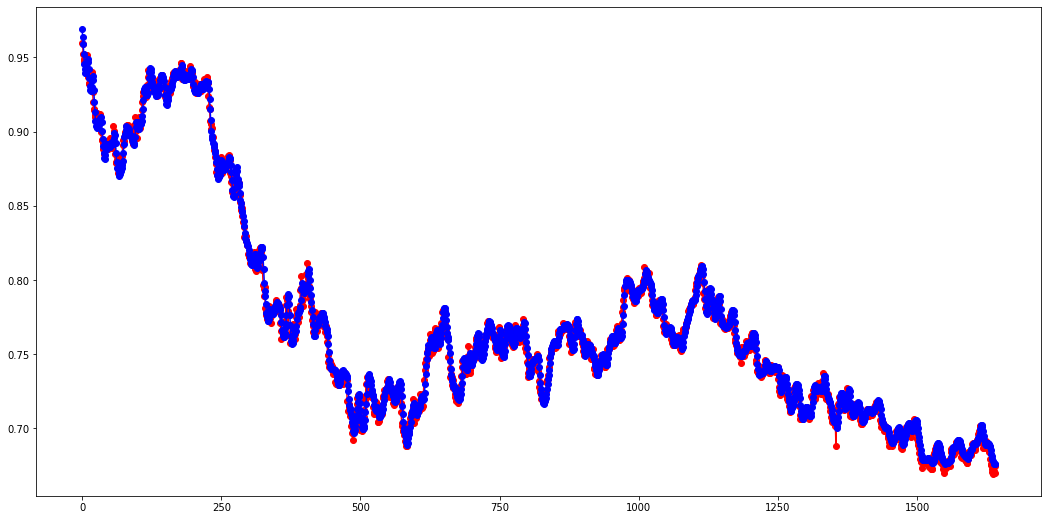

In [99]:
plt.figure(figsize=(18, 9))
plt.plot(test_data[30:], '-ro')
plt.plot(y_hat_inversed, '-bo')

In [100]:
print(train_data[-30:])

[[0.34309792]
 [0.33425093]
 [0.32854152]
 [0.32397937]
 [0.3227201 ]
 [0.32497481]
 [0.32794712]
 [0.32831692]
 [0.32894663]
 [0.32963562]
 [0.33186242]
 [0.33379668]
 [0.33246382]
 [0.32916853]
 [0.32506761]
 [0.32218013]
 [0.32048953]
 [0.31720412]
 [0.312658  ]
 [0.30881099]
 [0.30458026]
 [0.30229198]
 [0.30210121]
 [0.30507306]
 [0.3091274 ]
 [0.31328277]
 [0.31834989]
 [0.32512824]
 [0.33260843]
 [0.33876428]]


In [125]:
pred_list = []

batch = train_data[-30:].reshape((1, 30, 1))

for i in range(30):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
print(batch.flatten())

[0.33567938 0.34105453 0.34573415 0.34981674 0.35338578 0.35652062
 0.35928875 0.36175022 0.36396098 0.3659656  0.36780488 0.36951232
 0.37111941 0.3726587  0.3741492  0.37560976 0.37705293 0.37849125
 0.37993622 0.38139302 0.38286722 0.38436285 0.38588265 0.38742772
 0.38899842 0.39059219 0.39220718 0.39383727 0.39546955 0.39709553]


In [129]:
#plt.plot(train_data[30:])
plt.plot(batch.flatten(), color='-r')

ValueError: Invalid RGBA argument: '-r'

<Figure size 432x288 with 1 Axes>

In [118]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index=df[-30:].index, columns=['Prediction'])
df_midpt = pd.DataFrame(mid_prices, columns=['Mid-point'])
df_test = pd.concat([df,df_midpt, df_predict], axis=1)
df_test

,date,high,low,open,close,Mid-point,Prediction
0,1971-01-04,1.1127,1.1127,1.1127,1.1127,1.11270,NaN
1,1971-01-05,1.1132,1.1132,1.1132,1.1132,1.11320,NaN
2,1971-01-06,1.1140,1.1140,1.1140,1.1140,1.11400,NaN
3,1971-01-07,1.1138,1.1138,1.1138,1.1138,1.11380,NaN
4,1971-01-08,1.1124,1.1124,1.1124,1.1124,1.11240,NaN
...,...,...,...,...,...,...,...
12666,2020-02-03,0.6707,0.6682,0.6688,0.6692,0.66945,0.786354
12667,2020-02-04,0.6742,0.6679,0.6692,0.6739,0.67105,0.786838
12668,2020-02-05,0.6774,0.6724,0.6739,0.6746,0.67490,0.787325
12669,2020-02-06,0.6765,0.6727,0.6746,0.6730,0.67460,0.787814


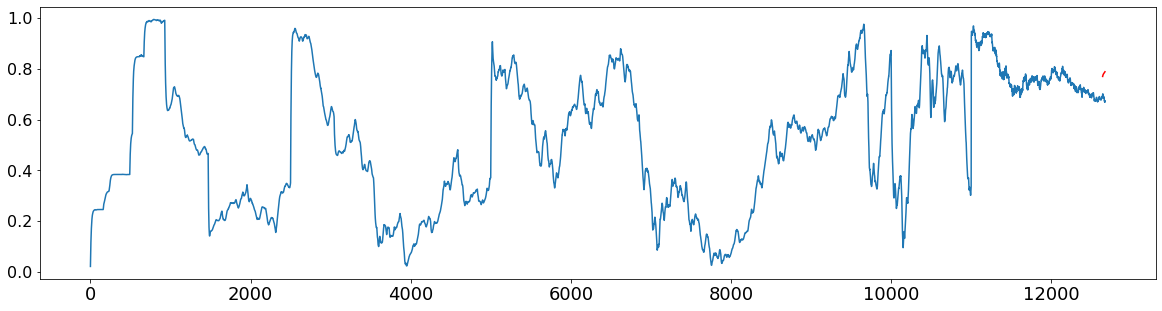

In [109]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Mid-point'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
#plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


In [14]:
print(len(test_data))
print(len(y_hat_inversed))

1671
1641


In [15]:
y_recent = y_hat_inversed[-31:]
#print(y_recent)
y_recent2 = scaler.fit_transform(y_recent)
recent_generator = TimeseriesGenerator(y_recent2, y_recent2, length=30, batch_size=1)
for i in recent_generator:
    print(i)
# recent_hat = model.predict(recent_generator)
# recent_hat_inversed = scaler.inverse_transform(recent_hat)
# print(recent_hat_inversed)

(array([[[0.6657963 ],
        [0.72571945],
        [0.7973175 ],
        [0.88565063],
        [0.9605255 ],
        [1.        ],
        [0.98394775],
        [0.93795013],
        [0.8448696 ],
        [0.72592926],
        [0.619154  ],
        [0.5452595 ],
        [0.51190186],
        [0.49624825],
        [0.4958477 ],
        [0.51893616],
        [0.52965355],
        [0.5237961 ],
        [0.50814056],
        [0.47413254],
        [0.45410728],
        [0.4234829 ],
        [0.3556671 ],
        [0.26475143],
        [0.19791412],
        [0.13586998],
        [0.08166885],
        [0.03614426],
        [0.00737572],
        [0.00200081]]], dtype=float32), array([[0.]], dtype=float32))


In [16]:
y_hat_inversed = np.append(y_hat_inversed, recent_hat_inversed)
print(y_hat_inversed)

NameError: name 'recent_hat_inversed' is not defined

In [ ]:
plt.plot(y_hat_inversed[-30:], '-r')
plt.plot(test_data[-30:], '-b')